## Capacitive Sensing Background

### Voltage and current

#### Voltage
Voltage is a difference in electrical potential measured between two nodes. 


#### Current
Current is the first derivative of voltage.

\begin{align}
    i(t) = \frac{d}{dt} v(t)
\end{align}



### Kirchhoff's circuit laws


#### Kirchhof's Current Law (KCL)
The sum of all currents entering a node equals zero.

\begin{align}
    \sum_{k=1}^{n} i_{k} = 0
\end{align}

**sign convention:** Current entering a node is considered positive (+) while current exiting a node is considered negative (-).

#### Kirchhoff's Voltage Law (KVL)
The sum of voltages around a closed loop equals zero.

\begin{align}
    \sum_{k=1}^{n} v_{k} = 0
\end{align}


### The Laplace Transform



Multiplying by $\textbf{s}$ equates to derivation in the time domain. 

\begin{align}
    & \textbf{s} = \frac{d}{dt} \\
        & \frac{1}{\textbf{s}} = \int dt
\end{align}

### Passive components

#### Resistors
Resistance is the opposition of current flow across a conductor. All conductors have an intrinsic resistance. *Resistors* are passive devices of a known resistance that restrict current flow. Resistance is determined by the conductor's *resistivity*, $\rho$, linear length, *l*, and cross-sectional area, $A$, as shown in the equation below.

\begin{align}
    R = \rho \frac{l}{A}
\end{align}

\begin{align}
    \text{Time domain: } & i(t) = \frac{1}{R} v(t) \\
    \text{Laplace domain: } & I(\textbf{s}) = \frac{1}{R} V(\textbf{s})
\end{align}


Resistance can also be expressed in terms of *conductivity*, $G$, where $ G = R^{-1}$.

\begin{align}
    \text{Time domain: } & i(t) = G v(t) \\
    \text{Laplace domain: } & I(\textbf{s}) = G V(\textbf{s})
\end{align}

#### Capacitors

\begin{equation}
    C = \epsilon_{0} \epsilon \frac{A}{d}
\end{equation}

\begin{align}
    i(t) &= C \frac{d}{dt} v(t) \\
    I(\textbf{s}) &= C \textbf{s} V(\textbf{s})
\end{align}


### Current between nodes

#### Resistors

<div><img src="Resources/Resistor_Nodes.svg" width="200"/></div>

\begin{equation}
    i_{1 \rightarrow 2}(t) = \frac{1}{R} \left(v_{1}(t) - v_{2}(t)\right)
\end{equation}

\begin{equation}
    I_{1 \rightarrow 2}(\textbf{s}) = \frac{1}{R} \left(V_{1}(\textbf{s}) - V_{2}(\textbf{s})\right)
\end{equation}

#### Capacitors

<div><img src="Resources/Capacitor_Nodes.svg" width="200"/></div>

\begin{equation}
    i_{1 \rightarrow 2}(t) = C \left(\frac{d}{dt} v_{1}(t) - \frac{d}{dt} v_{2}(t)\right)
\end{equation}

\begin{equation}
    I_{1 \rightarrow 2}(\textbf{s}) = C \textbf{s} \left(V_{1}(\textbf{s}) - V_{2}(\textbf{s})\right)
\end{equation}


## Simple RC Circuit






\begin{equation}
    V_{out}\left(\textbf{s}\right) = V_{in}\left(\textbf{s}\right)\frac{1}{RC \textbf{s} + 1}
\end{equation}

\begin{equation}
    \frac{V_{out}\left(\textbf{s}\right)}{V_{in}\left(\textbf{s}\right)} = \frac{1}{RC \textbf{s} + 1}
\end{equation}


<IPython.core.display.Javascript object>


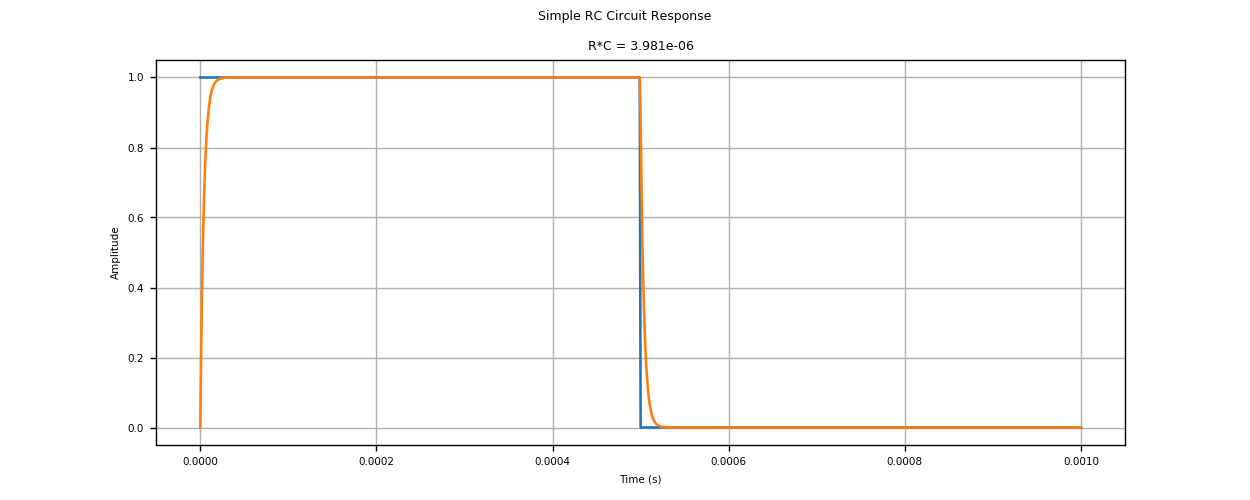

interactive(children=(Dropdown(description='Input', options=(('Pulse', <function pulse at 0x00000000177F8F28>)…

In [20]:
from scipy.signal import *
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
%matplotlib nbagg

fig, ax = plt.subplots(1, figsize=(10, 4))

def pulse(t1, dt=1e-6, duty=0.5):
    t = np.arange(0, t1, dt)
    u = np.ones(t.shape)
    u[t>=duty*t1] = 0
    return u, t

def sine(t1, dt=1e-6, f0=1000.0, phase=0.0):
    t = np.arange(0, t1, dt)
    u = np.sin(2*np.pi*f0*t + phase)
    return u, t

def sweep(t1, dt=1e-6, f0=1000.0, f1=5000.0):
    t = np.arange(0, t1, dt)
    u = chirp(t, f0, t1, f1)
    return u, t

def simpleRC(wav, R, C, t1):
    sys = TransferFunction([1], [(R*C), 1])
    u, t = wav(t1)
    tout, y, x = lsim(sys, u, t)
    
    ax.clear()
    plt.suptitle("Simple RC Circuit Response")
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(f'R*C = {R*C:.3e}')
    ax.plot(t, u)
    ax.plot(tout, y)
    plt.grid()
    plt.show()


waveform = widgets.Dropdown(
    options=[('Pulse', pulse), ('Sine', sine), ('Sweep', sweep)],
    description='Input'
)
cap = widgets.FloatLogSlider(
    value=10,
    base=10,
    min=-13,
    max=-9,
    step=0.2,
    description='C'
)
res = widgets.FloatLogSlider(
    value=1e-11,
    base=10,
    min=3,
    max=7,
    step=0.2,
    description='R'
)
t1 = widgets.BoundedFloatText(
    min=1e-5,
    max=1e-2,
    value=1e-3,
    step=1e-5,
    description="End time")

widgets.interactive(simpleRC, wav=waveform, R=res, C=cap, t1=t1)

## Realistic Capacitive Touch Circuit



## No Touch

When no touch is present, the cirucit consists of only current-limiting resistors $R_{A}$ and $R_{B}$, The cumulative fabric resistance $R_{K}$ and the parasitic capacitances $C_{p_{A}}$ and $C_{p_{B}}$. The values of $R_{A}$, $R_{B}$ and $R_{K}$ can be found through direct DC measurements. However, the values of the reactive components $C_{p_{A}}$ and $C_{p_{B}}$ cannot be measured without performing transient analysis.

$Ax=b$


\begin{align}
    \begin{bmatrix}
        R_{A}^{-1} && -R_{A}^{-1} && 0 && 0 && 1 && 0 \\
        -R_{A}^{-1} && \left(R_{A}^{-1} + R_{K}^{-1} + C_{p_{A}}\textbf{s}\right) && -R_{K}^{-1} && 0 && 0 && 0 \\
        0 && -R_{K}^{-1} && \left(R_{K}^{-1} + R_{B}^{-1} + C_{p_{B}}\textbf{s}\right) && -R_{B}^{-1} && 0 && 0 \\
        0 && 0 && -R_{B}^{-1} && R_{B}^{-1} && 0 && 1 \\
        1 && 0 && 0 && 0 && 0 && 0 \\
        0 && 0 && 0 && 1 && 0 && 0
    \end{bmatrix}
    \times
    \begin{bmatrix}
        v_{A} \\
        o_{A} \\
        o_{B} \\
        v_{B} \\
        i_{v_{A}}\\
        i_{v_{B}}
    \end{bmatrix}
    &=
    \begin{bmatrix}
        0 \\
        0 \\
        0 \\
        0 \\
        V_{A}\left(\textbf{s}\right) \\
        V_{B}\left(\textbf{s}\right)
    \end{bmatrix}
\end{align}


\begin{align}
    O_{A}\left(\textbf{s}\right) &= \frac{V_{A}\left(\textbf{s}\right)\left(C_{p_{B}}R_{B}R_{K}\textbf{s} + R_{B} + R_{K}\right) + V_{B}\left(\textbf{s}\right)R_{A}}{\Delta} \\
    O_{B}\left(\textbf{s}\right) &= \frac{V_{B}\left(\textbf{s}\right)\left(C_{p_{A}}R_{A}R_{K}\textbf{s} + R_{A} + R_{K}\right) + V_{B}\left(\textbf{s}\right)R_{B}}{\Delta}
\end{align}

\begin{align}
    \Delta &= C_{p_{A}}C_{p{B}}R_{A}R_{B}R_{K}\textbf{s}^{2} + \left(C_{p_{A}}R_{A}\left(R_{B} + R_{K}\right) + C_{p_{B}}R_{B}\left(R_{A} + R_{K}\right)\right)\textbf{s} + \left(R_{A} + R_{B} + R_{K}\right)
\end{align}

$V_{A}\left(\textbf{s}\right) = V_{B}\left(\textbf{s}\right)$

\begin{align}
    O_{A}\left(\textbf{s}\right) &= \frac{C_{p_{B}}R_{B}R_{K}\textbf{s} + \left(R_{A} + R_{B} + R_{K}\right)}{\Delta} \\
    O_{B}\left(\textbf{s}\right) &= \frac{C_{p_{A}}R_{A}R_{K}\textbf{s} + \left(R_{A} + R_{B} + R_{K}\right)}{\Delta}
\end{align}



\begin{align}
    O\left(\textbf{s}\right) &= \frac{n_{0}\textbf{s} + n_{1}}{d_{0}\textbf{s}^{2} + d_{1}\textbf{s} + d_{2}} \\
    O\left(\textbf{j} \omega\right) &= \frac{n_{0}\left(\textbf{j} \omega\right) + n_{1}}{d_{0}\left(\textbf{j} \omega\right)^{2} + d_{1}\left(\textbf{j} \omega\right) + d_{2}} \\
    O\left(\textbf{j} \omega\right) &= \frac{n_{1} + n_{0}\omega\textbf{j}}{\left(d_{2} - d_{0}\omega^{2}\right) + d_{1}\omega\textbf{j}}
\end{align}


Simplification of a complex fraction. The numerator $a + b\textbf{j}$ is multiplied by the complex conjugate $c - d\textbf{j}$ to cancel the complex terms of the denomonator. Thus, the fraction can be split into real and imaginary terms.

\begin{align}
    \frac{a + b\textbf{j}}{c + d\textbf{j}} \\
    \frac{a + b\textbf{j}}{c + d\textbf{j}}\left(\frac{c - d\textbf{j}}{c - d\textbf{j}}\right) \\
    \frac{ac -ad\textbf{j} + bc\textbf{j} + bd}{c^{2} + d^{2}} \\
    \frac{ac + bd}{c^{2} + d^{2}} + \frac{bc - ad}{c^{2} + d^{2}}\textbf{j}
\end{align}




### Small Fabric Resistance

If $R_{K}$ << $R_{A,B}$

### Large Fabric Resistance

If $R_{K}$ >> $R_{A,B}$

In [33]:
from math import pi
import numpy as np

def analyticalNoTouchSpectrum(w, CpA=40e-12, CpB=40e-12, RA=1e6, RB=1e6, RK=5e5):
    """
    Return the no-touch complex-valued anaytical spectrum
    System polynomials are computed using MATLAB
    """

    n00 = CpB*RB*RK
    n01 = RA + RB + RK

    n10 = CpA*RA*RK
    n11 = RA + RB + RK

    d0 = CpA*CpB*RA*RB*RK
    d1 = CpA*RA*(RB + RK) + CpB*RB*(RA + RK)
    d2 = RA + RB + RK

    a = np.array([n00*w, n10*w])
    b = np.array([n01, n11]).reshape(2, 1)
    c = np.repeat(np.array([d2 - d0*(w**2)]), 2, axis=0)
    d = np.repeat(np.array([d1*w]), 2, axis=0)

    num = (a*c + b*d) + 1j*(b*c - a*d)
    den = (c**2 + d**2)
    spec = np.divide(num, den).transpose()
    
    return spec

In [34]:
from scipy.signal import TransferFunction

def createNoTouchSystem(CpA=40e-12, CpB=40e-12, RA=1e6, RB=1e6, RK=5e5):
    """
    Create the single-input, multiple-output CTS transfer function
    System polynomials are computed using MATLAB
    """
    
    # Find the system numerator coefficient array
    # sysA
    n00 = CpB*RB*RK
    n01 = RA + RB + RK
    
    # sysB
    n10 = CpA*RA*RK
    n11 = RA + RB + RK
    
    num = [[n00, n01], [n10, n11]]
    
    # Find the system denomonator coefficient array
    d0 = CpA*CpB*RA*RB*RK
    d1 = (CpA + CpB)*RA*RB + (CpA*RA + CpB*RB)*RK
    d2 = RA + RB + RK
    
    den = [d0, d1, d2]
    
    sys = TransferFunction(num, den)
    
    return sys

<IPython.core.display.Javascript object>


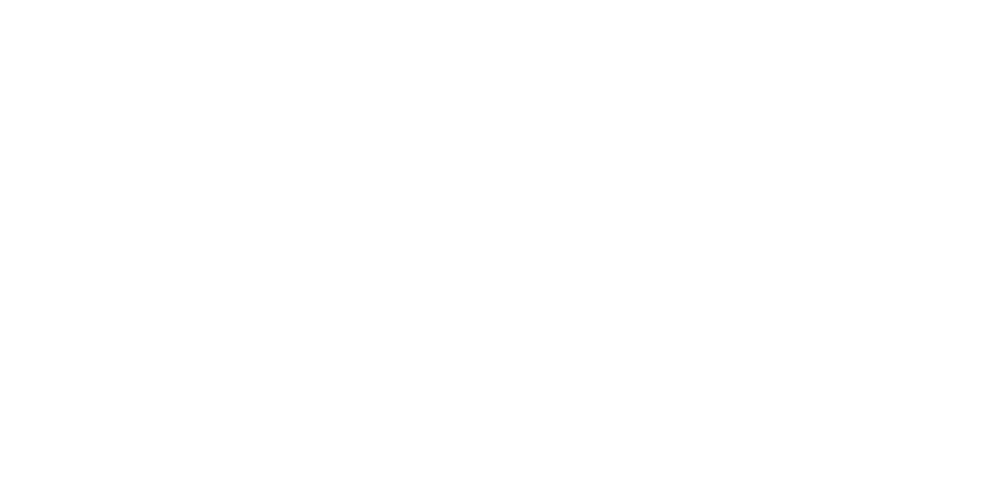

<IPython.core.display.Javascript object>


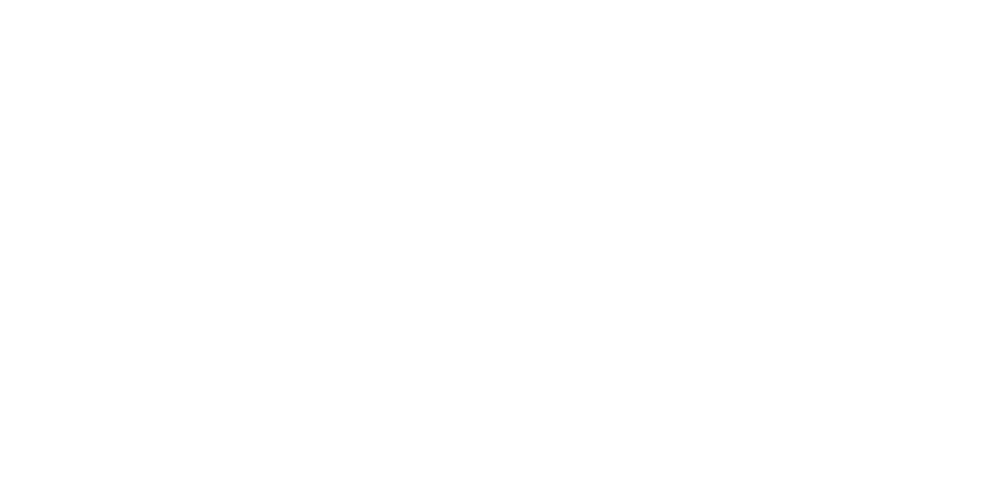

<IPython.core.display.Javascript object>


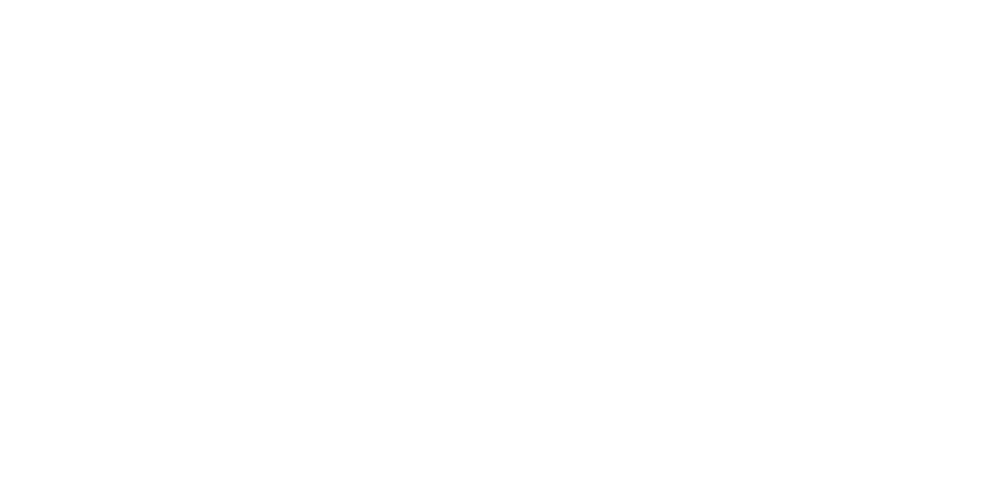

interactive(children=(FloatLogSlider(value=1e-10, description='CpA', max=-9.0, min=-13.0, step=0.2), FloatLogS…

In [35]:
from math import pi
from scipy.signal import *
from scipy.interpolate import interp1d
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import warnings
%matplotlib nbagg

warnings.filterwarnings('ignore') # Suppress scipy.signal.lsim ill-conditioned matrix warnings

font = {'family' : 'normal',
        'size'   : 6}

matplotlib.rc('font', **font)

fig0, ax0 = plt.subplots(1, figsize=(8, 4))
fig1, ax1 = plt.subplots(1, 2, figsize=(8, 4))
#fig3, ax3 = plt.subplots(1, figsize=(4, 4))
fig2, ax2 = plt.subplots(1, 2, figsize=(8, 4))

def sweep(t1, dt=1e-6, f0=2000.0, f1=26000.0):
    t = np.arange(0, t1, dt)
    u = 1.65*chirp(t, f0, t1, f1, method='log')
    return u, t

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def dcsnotouchFFT(CpA=40e-12, CpB=40e-12, RA=1e6, RB=1e6, RK=5e5):
    
    dt = 1/1e6
    f0 = 100.0
    f1 = 100000.0
    
    sys = createNoTouchSystem(CpA=CpA, CpB=CpB, RA=RA, RB=RB, RK=RK)
    t1 = 8e-3
    u, t = sweep(t1, dt=dt, f0=f0, f1=f1)
    tout, y, x = lsim(sys, u, t)
    
    f = np.fft.fftfreq(len(u), dt)
    f = f[range(int(len(f)/2))]
    fidx = (f >= f0) & (f <= f1)

    ufft = abs(np.fft.fft(u))/len(u) # Normalize amplitude
    ufft = 2*ufft[range(int(len(u)/2))] # Exclude sampling frequency

    yfft = abs(np.fft.fft(y, axis=0))/len(y) # Normalize amplitude
    yfft = 2*yfft[range(int(len(y)/2))] # Exclude sampling frequency

    gainA = np.divide(yfft[fidx,0], ufft[fidx])
    gainB = np.divide(yfft[fidx,1], ufft[fidx])

    spec = analyticalNoTouchSpectrum(2*pi*f[fidx], CpA=CpA, CpB=CpB, RA=RA, RB=RB, RK=RK)
    
    ax0.clear()
    ax1[0].clear()
    ax1[1].clear()
    ax2[0].clear()
    ax2[1].clear()
    
    ax0.plot(t, u, color='dimgray', linewidth=1)
    ax0.plot(t, y[:,0], color='tab:red', linewidth=1)
    ax0.plot(t, y[:,1], color='tab:blue', linewidth=1)
    ax0.set_xlim(0, t1)
    ax0lbl = ax0.get_xticks() * 1000
    ax0.set_xticklabels(ax0lbl.astype(str))
    ax0.set_xlabel('Time (ms)', fontsize=8)
    ax0.set_ylabel('Amplitude (V)', fontsize=8)
    ax0.grid(linestyle='--', linewidth=0.5)
    
    ax1[0].plot(f[fidx], ufft[fidx], color='dimgray', linewidth=1)
    ax1[0].plot(f[fidx], yfft[fidx,0], color='tab:red', linewidth=1)
    ax1[0].plot(f[fidx], yfft[fidx,1], color='tab:blue', linewidth=1)
    ax1[0].set_xlim(f0, f1)
    ax1lbl = ax1[0].get_xticks() / 1000
    ax1[0].set_xticklabels(ax1lbl.astype(str))
    ax1[0].set_xlabel('Frequency (kHz)', fontsize=8)
    ax1[0].set_ylabel('Amplitude (V)', fontsize=8)
    ax1[0].grid(linestyle='--', linewidth=0.5)
    
    ax1[1].semilogx(f[fidx], ufft[fidx], color='dimgray', linewidth=1)
    ax1[1].semilogx(f[fidx], yfft[fidx,0], color='tab:red', linewidth=1)
    ax1[1].semilogx(f[fidx], yfft[fidx,1], color='tab:blue', linewidth=1)
    ax1[1].set_xlim(f0, f1)
    ax1[1].set_xlabel('Frequency (Hz)', fontsize=8)
    ax1[1].set_ylabel('Amplitude (V)', fontsize=8)
    ax1[1].grid(linestyle='--', linewidth=0.5)
    
    fgA = interp1d(gainA, f[fidx])
    fgB = interp1d(gainB, f[fidx])
    
    ax2[0].loglog(f[fidx], gainA, color='tab:red', linewidth=1)
    ax2[0].loglog(f[fidx], gainB, color='tab:blue', linewidth=1)
    ax2[0].loglog(f[fidx], np.abs(spec)[:,0], color='tab:orange', linestyle='--', linewidth=1)
    ax2[0].loglog(f[fidx], np.abs(spec)[:,1], color='tab:green', linestyle='--', linewidth=1)
    ax2[0].set_xlim(f0, f1)
    ax2[0].set_ylim(1e-2, 1e0)
    ax2lbl = ax2[0].get_xticks() / 1000
    ax2[0].set_xticklabels(ax2lbl.astype(str))
    ax2[0].set_xlabel('Frequency (Hz)', fontsize=8)
    ax2[0].set_ylabel('Gain', fontsize=8)
    ax2[0].grid(linestyle='--', linewidth=0.5)
    
    pts = 10**(np.array([-3, -6]) / 20.0)
    
    ax2[0].loglog(fgA(pts), pts, '.', color='tab:red')
    ax2[0].loglog(fgB(pts), pts, '.', color='tab:blue')
    
    ax2[1].loglog(gainA, gainB, color='darkgray', linewidth=1)
    ax2[1].loglog(np.mean(gainA), np.mean(gainB), '.', color='dimgray')
    
    for i, c in enumerate(ax2[1].get_xticks()[1:-1]):
        ax2[1].text(gainA[find_nearest(f[fidx], c)], gainB[find_nearest(f[fidx], c)], str(c/1000) + 'kHz')
    
    ax2[1].set_xlim(1e-3, 1e0)
    ax2[1].set_ylim(1e-3, 1e0)
    ax2[1].set_xlabel('Gain_A', fontsize=8)
    ax2[1].set_ylabel('Gain_B', fontsize=8)
    ax2[1].grid(linestyle='--', linewidth=0.5)
    
    plt.show()


cpa = widgets.FloatLogSlider(
    value=1e-10,
    base=10,
    min=-13,
    max=-9,
    step=0.2,
    description='CpA'
)
cpb = widgets.FloatLogSlider(
    value=1e-10,
    base=10,
    min=-13,
    max=-9,
    step=0.2,
    description='CpB'
)
ra = widgets.FloatLogSlider(
    value=1e6,
    base=10,
    min=3,
    max=7,
    step=0.2,
    description='RA'
)
rb = widgets.FloatLogSlider(
    value=1e6,
    base=10,
    min=3,
    max=7,
    step=0.2,
    description='RB'
)
rk = widgets.FloatLogSlider(
    value=1e6,
    base=10,
    min=3,
    max=7,
    step=0.2,
    description='RK'
)


widgets.interactive(dcsnotouchFFT, CpA=cpa, CpB=cpb, RA=ra, RB=rb, RK=rk)




## Single Touch

### Localizing Touch Along a Conductor


\begin{align}
    Ax &= b
    \begin{bmatrix}
        R_{A}^{-1} && -R_{A}^{-1} && 0 && 0 && 0 && 1 && 0 \\
        -R_{A}^{-1} && (R_{A}^{-1} + R_{K}^{-1}x + C_{p_{A}}\textbf{s}) && -R_{K}^{-1}x && 0 && 0 && 0 && 0 \\
        0 && -R_{K}^{-1}x && (R_{K}^{-1} + C_{t}\textbf{s}) && -R_{K}^{-1}(1-x) && 0 && 0 && 0 \\
        0 && 0 && -R_{K}^{-1}(1-x) && (R_{K}^{-1}(1-x) + R_{B}^{-1} + C_{p_{B}}\textbf{s}) && -R_{B}^{-1} && 0 && 0 \\
        0 && 0 && 0 && -R_{B}^{-1} && R_{B}^{-1} && 0 && 1 \\
        1 && 0 && 0 && 0 && 0 && 0 && 0 \\
        0 && 0 && 0 && 0 && 1 && 0 && 0
    \end{bmatrix}
    \times 
    \begin{bmatrix}
        v_{A} \\
        o_{A} \\
        e_{1} \\
        o_{B} \\
        v_{B} \\
        i_{v_{A}}\\
        i_{v_{B}}
    \end{bmatrix}
    &=
    \begin{bmatrix}
        0 \\
        0 \\
        0 \\
        0 \\
        0 \\
        V_{A} \\
        V_{B}
    \end{bmatrix}
\end{align}


\begin{align}
    H\left(\textbf{s}\right) &= \frac{n_{0}\textbf{s}^{2} + n_{1}\textbf{s} + n_{2}}{d_{0}\textbf{s}^{3} + d_{1}\textbf{s}^{2} + d_{2}\textbf{s} + d_{3}} \\
    H\left(\textbf{j} \omega\right) &= \frac{n_{0}{\left(\textbf{j} \omega\right)}^{2} + n_{1}\left(\textbf{j} \omega\right) + n_{2}}{d_{0}{\left(\textbf{j} \omega\right)}^{3} + d_{1}{\left(\textbf{j} \omega\right)}^{2} + d_{2}\left(\textbf{j} \omega\right) + d_{3}} \\
    H\left(\textbf{j} \omega\right) &= \frac{-n_{0}{\omega}^{2} + n_{1}\omega \textbf{j} + n_{2}}{-d_{0}{\omega}^{3}\textbf{j} - d_{1}{\omega}^{2} + d_{2}\omega\textbf{j} + d_{3}} = \frac{\left(n_{2} - n_{0}{\omega}^{2}\right) + \left(n_{1}\omega\right)\textbf{j}}{\left(d_{3} - d_{1}\omega^{2}\right) + \left(d_{2}\omega - d_{0}\omega^{3}\right)\textbf{j}}
\end{align}


Numerators of the transfer functions.
\begin{align}
    o_{A}\left(\textbf{s}\right) &= \frac{\left(C_{p_{B}}C_{t}R_{B}R_{K}^{2}x\left(x-1\right)\right)\textbf{s}^{2} + \left(C_{p_{B}}R_{B}R_{K} + C_{t}R_{K}x\left(R_{B} + R_{K}\left( 1-x \right)\right)\right)\textbf{s} + \left(R_{A} + R_{B} + R_{K}\right)}{\Delta} \\
    o_{B}\left(\textbf{s}\right) &= \frac{\left(C_{p_{A}}C_{t}R_{A}R_{K}^{2}x\left(x-1\right)\right)\textbf{s}^{2} + \left(C_{p_{A}}R_{A}R_{K} + C_{t}R_{K}\left( 1-x \right)\left(R_{A} + R_{K}x\right)\right)\textbf{s} + \left(R_{A} + R_{B} + R_{K}\right)}{\Delta}
\end{align}

Denomonator of the transfer functions.
\begin{align}
    \Delta = \left(C_{p_{A}}C_{p_{B}}C_{t}R_{A}R_{B}R_{K}^{2}x\left(1-x\right)\right)&\textbf{s}^{3} \\
    + \left(C_{p_{A}}C_{p_{B}}R_{A}R_{B}R_{K} + \left(C_{p_{A}} + C_{p_{B}}\right)\left(C_{t}R_{A}R_{B}R_{K}\right) + \left(C_{p_{A}}R_{A} + C_{p_{B}}R_{B}\right)\left(C_{t}R_{B}R_{K}^{2}x\left(1-x\right)\right)\right)&\textbf{s}^{2} \\
    + \left(\left(C_{p_{A}} + C_{p_{B}} + C_{t}\right)\left(R_{A}R_{B}\right) + \left(C_{p_{A}}R_{A} + C_{p_{B}}R_{B}\right)R_{K} + C_{t}\left(R_{A}R_{K}\left(1-x\right) + R_{B}R_{K}x + R_{K}^{2}x\left(1-x\right)\right)\right)&\textbf{s} \\
    + \left(R_{A} + R_{B} + R_{K}\right)&
\end{align}

Sinusoid input.
\begin{align}
    o_{A}\left(\textbf{j} \omega\right) &= \frac{\left(C_{p_{B}}C_{t}R_{B}R_{K}^{2}x\left(x-1\right)\right){\left(\textbf{j} \omega\right)}^{2} + \left(C_{p_{B}}R_{B}R_{K} + C_{t}R_{K}x\left(R_{B} + R_{K}\left( 1-x \right)\right)\right)\left(\textbf{j} \omega\right) + \left(R_{A} + R_{B} + R_{K}\right)}{\Delta} \\
    o_{B}\left(\textbf{j} \omega\right) &= \frac{\left(C_{p_{A}}C_{t}R_{A}R_{K}^{2}x\left(x-1\right)\right){\left(\textbf{j} \omega\right)}^{2} + \left(C_{p_{A}}R_{A}R_{K} + C_{t}R_{K}\left( 1-x \right)\left(R_{A} + R_{K}x\right)\right)\left(\textbf{j} \omega\right) + \left(R_{A} + R_{B} + R_{K}\right)}{\Delta}
\end{align}


\begin{align}
    \Delta &= \left(C_{p_{A}}C_{p_{B}}C_{t}R_{A}R_{B}R_{K}^{2}x\left(1-x\right)\right)&{\left(\textbf{j} \omega\right)}^{3} \\
    + \left(C_{p_{A}}C_{p_{B}}R_{A}R_{B}R_{K} + \left(C_{p_{A}} + C_{p_{B}}\right)\left(C_{t}R_{A}R_{B}R_{K}\right) + \left(C_{p_{A}}R_{A} + C_{p_{B}}R_{B}\right)\left(C_{t}R_{B}R_{K}^{2}x\left(1-x\right)\right)\right)&{\left(\textbf{j} \omega\right)}^{2} \\
    + \left(\left(C_{p_{A}} + C_{p_{B}} + C_{t}\right)\left(R_{A}R_{B}\right) + \left(C_{p_{A}}R_{A} + C_{p_{B}}R_{B}\right)R_{K} + C_{t}\left(R_{A}R_{K}\left(1-x\right) + R_{B}R_{K}x + R_{K}^{2}x\left(1-x\right)\right)\right)&\left(\textbf{j} \omega\right) \\
    + \left(R_{A} + R_{B} + R_{K}\right)&
\end{align}





## Double Touch

### Localizing Touch Along a Conductor


\begin{align}
    Ax &= b
    \begin{bmatrix}
        R_{A}^{-1} && -R_{A}^{-1} && 0 && 0 && 0 && 0 && 1 && 0 \\
        -R_{A}^{-1} && (R_{A}^{-1} + R_{K}^{-1}x_{1} + C_{p_{A}}\textbf{s}) && -R_{K}^{-1}x_{1} && 0 && 0 && 0 && 0 && 0 \\
        0 && -R_{K}^{-1}x_{1} && (R_{K}^{-1}x_{2} + C_{t_{1}}\textbf{s}) && -R_{K}^{-1}\left(x_{2}-x_{1}\right) && 0 && 0 && 0 && 0 \\
        0 && 0 && -R_{K}^{-1}\left(x_{2}-x_{1}\right) && \left(R_{K}^{-1}\left(1-x_{1}\right) + C_{t_{2}}\textbf{s}\right) && -R_{K}^{-1}\left(1-x_{2}\right) && 0 && 0 && 0 \\
        0 && 0 && 0 && -R_{K}^{-1}\left(1-x_{2}\right) && \left(R_{K}^{-1}\left(1-x_{2}\right) + R_{B}^{-1} + C_{p_{B}}\textbf{s}\right) && -R_{B}^{-1} && 0 && 0 \\
        0 && 0 && 0 && 0 && -R_{B}^{-1} && R_{B}^{-1} && 0 && 1 \\
        1 && 0 && 0 && 0 && 0 && 0 && 0 && 0 \\
        0 && 0 && 0 && 0 && 0 && 1 && 0 && 0
    \end{bmatrix}
    \times 
    \begin{bmatrix}
        v_{A} \\
        o_{A} \\
        e_{1} \\
        o_{B} \\
        v_{B} \\
        i_{v_{A}}\\
        i_{v_{B}}
    \end{bmatrix}
    &=
    \begin{bmatrix}
        0 \\
        0 \\
        0 \\
        0 \\
        0 \\
        V_{A} \\
        V_{B}
    \end{bmatrix}
\end{align}

In [36]:
from scipy.signal import TransferFunction

def createSystem(x, Ct, RA=1e6, RB=1e6, RK=5e5, CpA=20e-12, CpB=20e-12):
    """
    Create the single-input, multiple-output CTS transfer function
    System polynomials are computed using MATLAB
    """
    
    RK0 = RK*x
    RK1 = RK*(1-x)
    
    # Find the system numerator coefficient array
    # sysA
    n00 = RA + RB + RK
    n01 = CpB*RB*RK + Ct*RK0*(RB + RK1)
    n02 = CpB*Ct*RB*RK0*RK1
    
    # sysB
    n10 = RA + RB + RK
    n11 = CpA*RA*RK + Ct*RK1*(RA + RK0)
    n12 = CpA*Ct*RA*RK0*RK1
    
    num = [[n02, n01, n00], [n12, n11, n10]]
    
    # Find the system denomonator coefficient array
    d0 = RA + RB + RK
    d1 = (CpA + CpB + Ct)*RA*RB + (CpA*RA + CpB*RB)*RK + Ct*(RA*RK1 + RB*RK0 + RK0*RK1)
    d2 = CpA*CpB*RA*RB*RK + CpA*Ct*RA*RK0*(RB + RK1) + CpB*Ct*RB*RK1*(RA + RK0)
    d3 = CpA*CpB*Ct*RA*RB*RK0*RK1
    
    den = [d3, d2, d1, d0]
    
    sys = TransferFunction(num, den)
    
    return sys


<IPython.core.display.Javascript object>


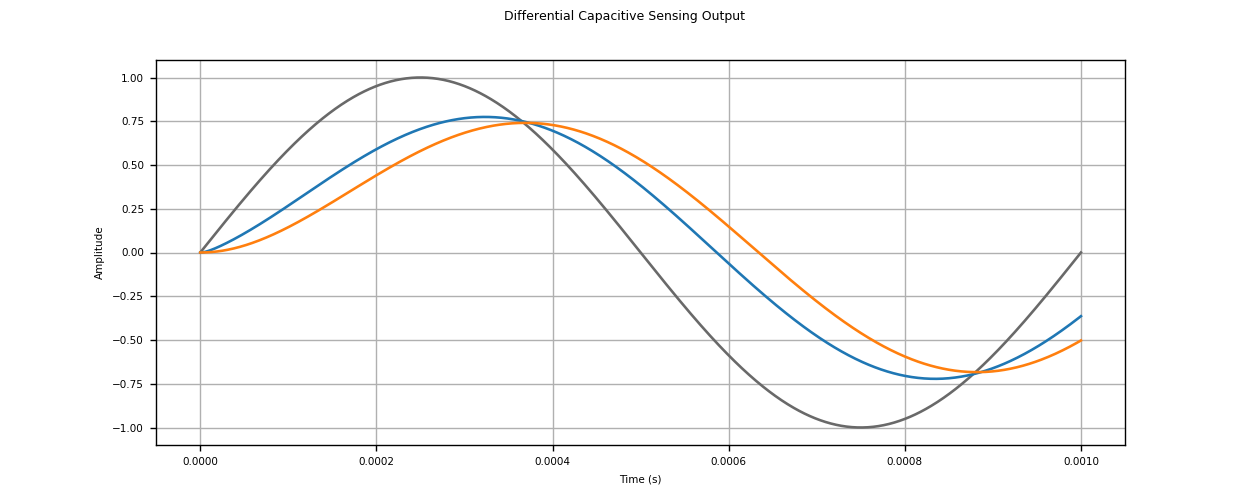

interactive(children=(Dropdown(description='Input', options=(('Pulse', <function pulse at 0x000000000EAFE1E0>)…

In [37]:
from scipy.signal import *
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import warnings
%matplotlib nbagg

warnings.filterwarnings('ignore') # Suppress scipy.signal.lsim ill-conditioned matrix warnings

fig, ax = plt.subplots(1, figsize=(10, 4))

def pulse(t1, dt=1e-6, duty=0.5):
    t = np.arange(0, t1, dt)
    u = np.ones(t.shape)
    u[t>=duty*t1] = 0
    return u, t

def sine(t1, dt=1e-6, f0=1000.0, phase=0.0):
    t = np.arange(0, t1, dt)
    u = np.sin(2*np.pi*f0*t + phase)
    return u, t

def sweep(t1, dt=1e-6, f0=2000.0, f1=26000.0):
    t = np.arange(0, t1, dt)
    u = chirp(t, f0, t1, f1)
    return u, t

def dcs(wav, x, Ct, t1):
    sys = createSystem(x, Ct)
    u, t = wav(t1)
    tout, y, x = lsim(sys, u, t)
    
    ax.clear()
    plt.suptitle("Differential Capacitive Sensing Output")
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('')
    ax.plot(t, u, 'dimgray')
    ax.plot(tout, y)
    plt.grid()
    plt.show()


waveform = widgets.Dropdown(
    options=[('Pulse', pulse), ('Sine', sine), ('Sweep', sweep)],
    description='Input'
)
ct = widgets.FloatLogSlider(
    value=1e-11,
    base=10,
    min=-13,
    max=-9,
    step=0.2,
    description='Ct'
)
pos = widgets.FloatSlider(
    value=.3,
    min=0,
    max=1,
    step=0.01,
    description='x'
)
t1 = widgets.BoundedFloatText(
    min=1e-5,
    max=1e-2,
    value=1e-3,
    step=1e-5,
    description="End time")

widgets.interactive(dcs, wav=waveform, x=pos, Ct=ct, t1=t1)

<IPython.core.display.Javascript object>


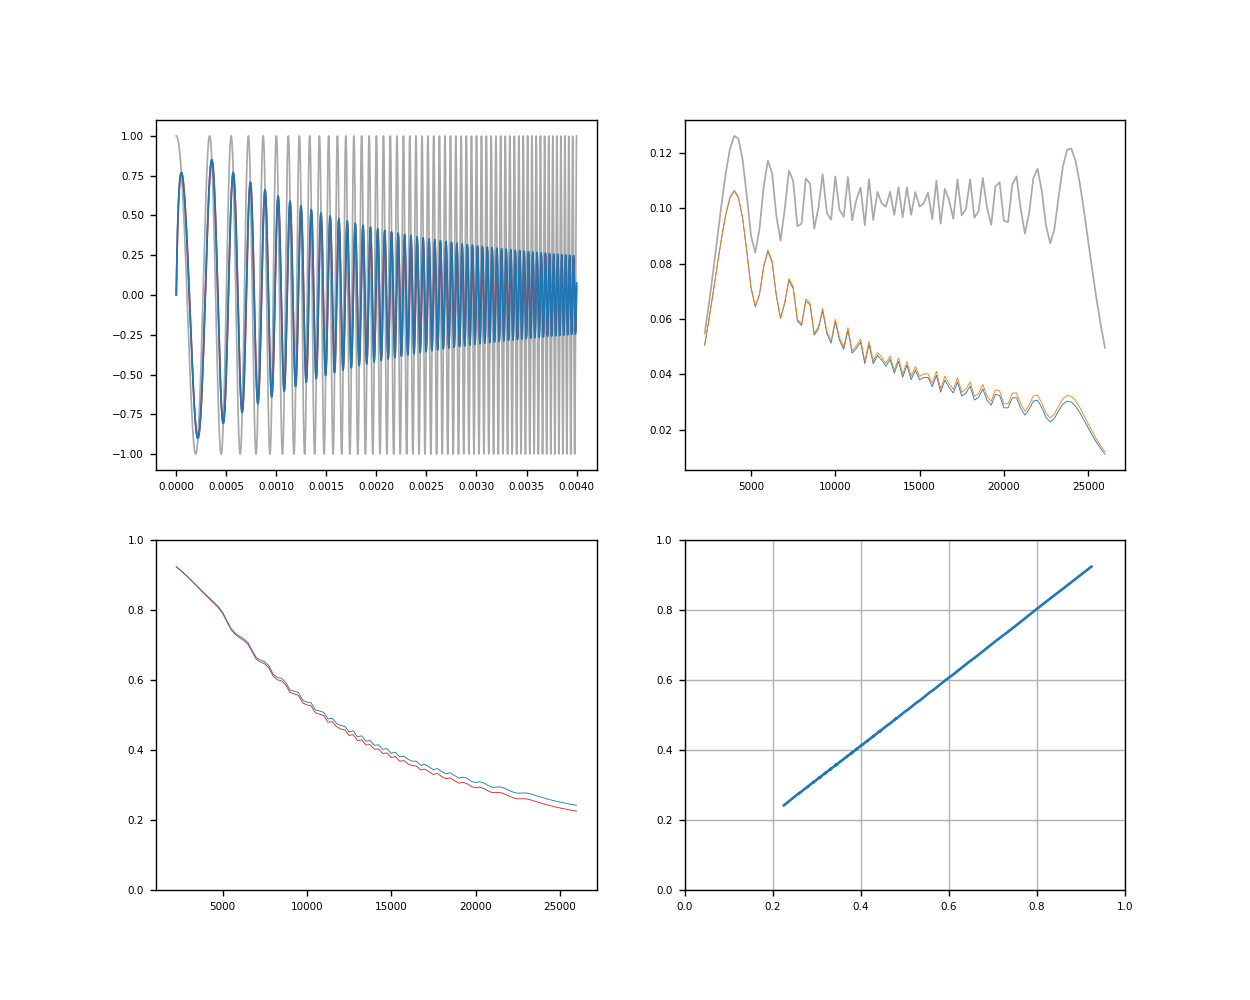

interactive(children=(FloatSlider(value=0.3, description='x', max=1.0, step=0.01), FloatLogSlider(value=1e-11,…

In [42]:
from scipy.signal import *
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import warnings
%matplotlib nbagg

warnings.filterwarnings('ignore') # Suppress scipy.signal.lsim ill-conditioned matrix warnings

fig, ax = plt.subplots(2, 2, figsize=(10, 8))

def sweep(t1, dt=1e-6, f0=2000.0, f1=26000.0):
    t = np.arange(0, t1, dt)
    u = chirp(t, f0, t1, f1)
    return u, t

def dcsFFT(x, Ct):
    sys = createSystem(x=x, Ct=Ct)
    t1 = 4e-3
    u, t = sweep(t1)
    tout, y, x = lsim(sys, u, t)

    dt = 1e-6
    f0 = 2000.0
    f1 = 26000.0
    f = np.fft.fftfreq(len(u), dt)
    f = f[range(int(len(f)/2))]
    fidx = (f >= f0) & (f <= f1)

    ufft = abs(np.fft.fft(u))/len(u) # Normalize amplitude
    ufft = 2*ufft[range(int(len(u)/2))] # Exclude sampling frequency

    yfft = abs(np.fft.fft(y, axis=0))/len(y) # Normalize amplitude
    yfft = 2*yfft[range(int(len(y)/2))] # Exclude sampling frequency

    gainA = np.divide(yfft[fidx,0], ufft[fidx])
    gainB = np.divide(yfft[fidx,1], ufft[fidx])

    for a in ax.flat:
        a.clear()
    
    ax[0,0].plot(t, u, color='darkgray', linewidth=1)
    ax[0,0].plot(t, y[:,0], color='tab:red', linewidth=1)
    ax[0,0].plot(t, y[:,1], color='tab:blue', linewidth=1)
    ax[0,1].plot(f[fidx], ufft[fidx], color='darkgray', linewidth=1)
    ax[0,1].plot(f[fidx], yfft[fidx], linewidth=0.5)
    ax[1,0].plot(f[fidx], gainA, color='tab:red', linewidth=0.5)
    ax[1,0].plot(f[fidx], gainB, color='tab:blue', linewidth=0.5)
    ax[1,0].set_ylim(0, 1)
    ax[1,1].plot(gainA, gainB)
    ax[1,1].set_xlim(0, 1)
    ax[1,1].set_ylim(0, 1)
    plt.grid()
    plt.show()

ct = widgets.FloatLogSlider(
    value=1e-11,
    base=10,
    min=-13,
    max=-9,
    step=0.2,
    description='Ct'
)
pos = widgets.FloatSlider(
    value=.3,
    min=0,
    max=1,
    step=0.01,
    description='x'
)

widgets.interactive(dcsFFT, wav=waveform, x=pos, Ct=ct)

In [17]:
from scipy.signal import TransferFunction

def createSingleTouchSystem(x, Ct, RA=1e6, RB=1e6, RK=5e5, CpA=40e-12, CpB=40e-12):
    """
    Create the single-input, multiple-output CTS transfer function
    System polynomials are computed using MATLAB
    """
    
    RK0 = RK*x
    RK1 = RK*(1-x)
    
    # Find the system numerator coefficient array
    # sysA
    n02 = RA + RB + RK
    n01 = CpB*RB*RK + Ct*RK0*(RB + RK1)
    n00 = CpB*Ct*RB*RK0*RK1
    
    # sysB
    n12 = RA + RB + RK
    n11 = CpA*RA*RK + Ct*RK1*(RA + RK0)
    n10 = CpA*Ct*RA*RK0*RK1
    
    num = [[n00, n01, n02], [n10, n11, n12]]
    
    # Find the system denomonator coefficient array
    d3 = RA + RB + RK
    d2 = (CpA + CpB + Ct)*RA*RB + (CpA*RA + CpB*RB)*RK + Ct*(RA*RK1 + RB*RK0 + RK0*RK1)
    d1 = CpA*CpB*RA*RB*RK + CpA*Ct*RA*RK0*(RB + RK1) + CpB*Ct*RB*RK1*(RA + RK0)
    d0 = CpA*CpB*Ct*RA*RB*RK0*RK1
    
    den = [d0, d1, d2, d3]
    
    sys = TransferFunction(num, den)
    
    return sys

In [18]:
from math import pi
import numpy as np

def analyticalSingleTouchSpectrum(w, x, Ct, CpA=40e-12, CpB=40e-12, RA=1e6, RB=1e6, RK=5e5):
    """
    Return the single-touch complex-valued anaytical spectrum
    System polynomials are computed using MATLAB
    """
    
    RK0 = RK*x
    RK1 = RK*(1-x)
    
    # Find the system numerator coefficient array
    # sysA
    n02 = RA + RB + RK
    n01 = CpB*RB*RK + Ct*RK0*(RB + RK1)
    n00 = CpB*Ct*RB*RK0*RK1
    
    # sysB
    n12 = RA + RB + RK
    n11 = CpA*RA*RK + Ct*RK1*(RA + RK0)
    n10 = CpA*Ct*RA*RK0*RK1
    
    # Find the system denomonator coefficient array
    d3 = RA + RB + RK
    d2 = (CpA + CpB + Ct)*RA*RB + (CpA*RA + CpB*RB)*RK + Ct*(RA*RK1 + RB*RK0 + RK0*RK1)
    d1 = CpA*CpB*RA*RB*RK + CpA*Ct*RA*RK0*(RB + RK1) + CpB*Ct*RB*RK1*(RA + RK0)
    d0 = CpA*CpB*Ct*RA*RB*RK0*RK1

    a = np.array([n02 - n00*(w**2), n12 - n10*(w**2)])
    b = np.array([n01*w, n11*w]).reshape(2, w.shape[0])
    c = np.repeat(np.array([d3 - d1*(w**2)]), 2, axis=0)
    d = np.repeat(np.array([d2*w - d0*(w**3)]), 2, axis=0)

    num = (a*c + b*d) + 1j*(b*c - a*d)
    den = (c**2 + d**2)
    spec = np.divide(num, den).transpose()
    
    return spec

<IPython.core.display.Javascript object>


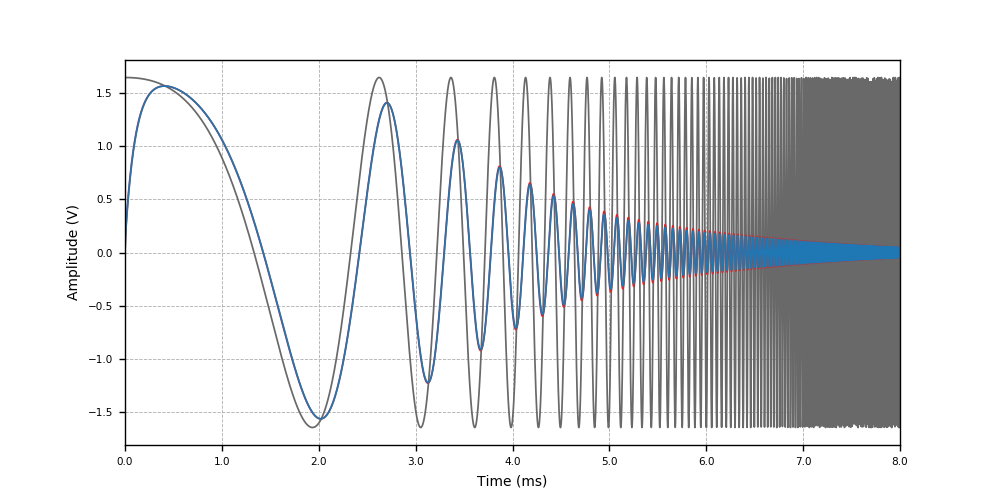

<IPython.core.display.Javascript object>


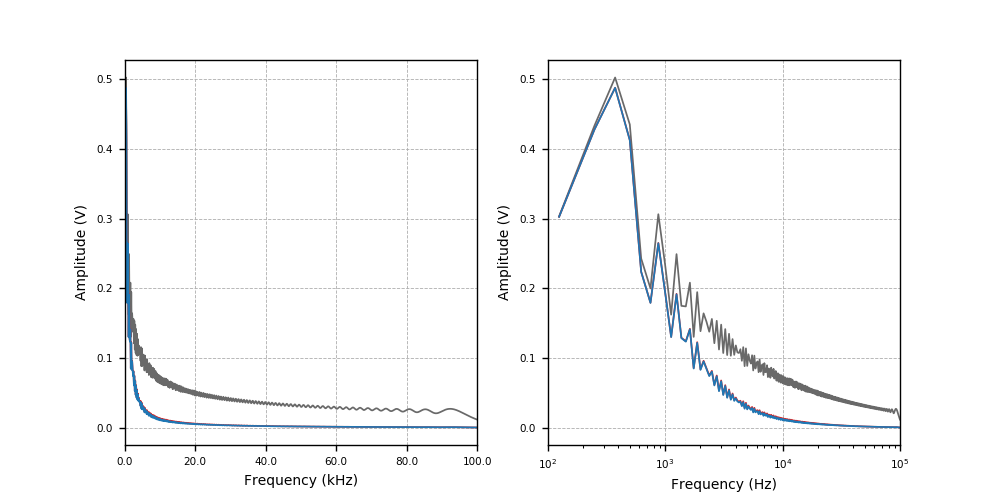

<IPython.core.display.Javascript object>


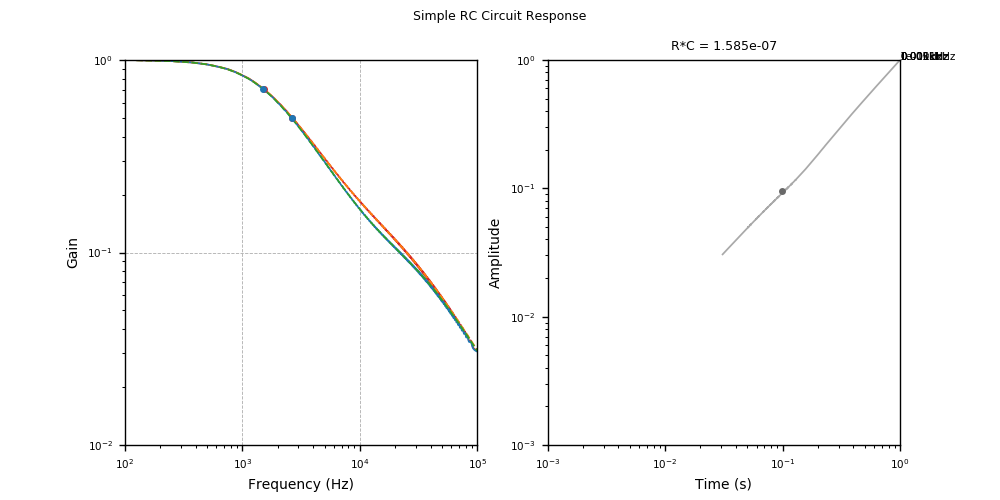

interactive(children=(FloatSlider(value=0.8, continuous_update=False, description='x', max=1.0, step=0.01), Fl…

In [19]:
from scipy.signal import *
from scipy.interpolate import interp1d
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import warnings
%matplotlib nbagg

warnings.filterwarnings('ignore') # Suppress scipy.signal.lsim ill-conditioned matrix warnings

font = {'family' : 'normal',
        'size'   : 6}

matplotlib.rc('font', **font)

fig0, ax0 = plt.subplots(1, figsize=(8, 4))
fig1, ax1 = plt.subplots(1, 2, figsize=(8, 4))
#fig3, ax3 = plt.subplots(1, figsize=(4, 4))
fig2, ax2 = plt.subplots(1, 2, figsize=(8, 4))

def sweep(t1, dt=1e-6, f0=2000.0, f1=26000.0):
    t = np.arange(0, t1, dt)
    u = 1.65*chirp(t, f0, t1, f1, method='log')
    return u, t

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def savefigs():
    fig0.savefig('Output_Waveforms.pdf',
                 dpi=None,
                 facecolor='w',
                 edgecolor='w',
                 orientation='portrait',
                 papertype=None,
                 format='pdf',
                 transparent=False,
                 bbox_inches=None,
                 pad_inches=0,
                 frameon=None,
                 metadata=None)
    
    fig1.savefig('FFT_Waveforms.pdf',
                 dpi=None,
                 facecolor='w',
                 edgecolor='w',
                 orientation='portrait',
                 papertype=None,
                 format='pdf',
                 transparent=False,
                 bbox_inches=None,
                 pad_inches=0,
                 frameon=None,
                 metadata=None)
    
    fig2.savefig('FFT_Gain.pdf',
                 dpi=None,
                 facecolor='w',
                 edgecolor='w',
                 orientation='portrait',
                 papertype=None,
                 format='pdf',
                 transparent=False,
                 bbox_inches=None,
                 pad_inches=0,
                 frameon=None,
                 metadata=None)
    
    fig3.savefig('Gain_Comparison.pdf',
                 dpi=None,
                 facecolor='w',
                 edgecolor='w',
                 orientation='portrait',
                 papertype=None,
                 format='pdf',
                 transparent=False,
                 bbox_inches=None,
                 pad_inches=0,
                 frameon=None,
                 metadata=None)


def dcsFFT(x, Ct):
    
    dt = 1/1e6
    f0 = 1e2
    f1 = 1e5
    
    CpA = 50e-12
    CpB = 50e-12
    RA = 1e6
    RB = 1e6
    RK = 5e5
    
    sys = createSingleTouchSystem(x=x, Ct=Ct, CpA=CpA, CpB=CpB, RA=RA, RB=RB, RK=RK)
    t1 = 8e-3
    u, t = sweep(t1, dt=dt, f0=f0, f1=f1)
    tout, y, xout = lsim(sys, u, t)
    
    f = np.fft.fftfreq(len(u), dt)
    f = f[range(int(len(f)/2))]
    fidx = (f >= f0) & (f <= f1)

    ufft = abs(np.fft.fft(u))/len(u) # Normalize amplitude
    ufft = 2*ufft[range(int(len(u)/2))] # Exclude sampling frequency

    yfft = abs(np.fft.fft(y, axis=0))/len(y) # Normalize amplitude
    yfft = 2*yfft[range(int(len(y)/2))] # Exclude sampling frequency

    gainA = np.divide(yfft[fidx,0], ufft[fidx])
    gainB = np.divide(yfft[fidx,1], ufft[fidx])

    spec = analyticalSingleTouchSpectrum(2*pi*f[fidx], x, Ct, CpA=CpA, CpB=CpB, RA=RA, RB=RB, RK=RK)
    
    ax0.clear()
    ax1[0].clear()
    ax1[1].clear()
    ax2[0].clear()
    ax2[1].clear()
    
    
    ax0.plot(t, u, color='dimgray', linewidth=1)
    ax0.plot(t, y[:,0], color='tab:red', linewidth=1)
    ax0.plot(t, y[:,1], color='tab:blue', linewidth=1)
    ax0.set_xlim(0, t1)
    ax0lbl = ax0.get_xticks() * 1000
    ax0.set_xticklabels(ax0lbl.astype(str))
    ax0.set_xlabel('Time (ms)', fontsize=8)
    ax0.set_ylabel('Amplitude (V)', fontsize=8)
    ax0.grid(linestyle='--', linewidth=0.5)
    
    ax1[0].plot(f[fidx], ufft[fidx], color='dimgray', linewidth=1)
    ax1[0].plot(f[fidx], yfft[fidx,0], color='tab:red', linewidth=1)
    ax1[0].plot(f[fidx], yfft[fidx,1], color='tab:blue', linewidth=1)
    ax1[0].set_xlim(f0, f1)
    ax1lbl = ax1[0].get_xticks() / 1000
    ax1[0].set_xticklabels(ax1lbl.astype(str))
    ax1[0].set_xlabel('Frequency (kHz)', fontsize=8)
    ax1[0].set_ylabel('Amplitude (V)', fontsize=8)
    ax1[0].grid(linestyle='--', linewidth=0.5)
    
    ax1[1].semilogx(f[fidx], ufft[fidx], color='dimgray', linewidth=1)
    ax1[1].semilogx(f[fidx], yfft[fidx,0], color='tab:red', linewidth=1)
    ax1[1].semilogx(f[fidx], yfft[fidx,1], color='tab:blue', linewidth=1)
    ax1[1].set_xlim(f0, f1)
    ax1[1].set_xlabel('Frequency (Hz)', fontsize=8)
    ax1[1].set_ylabel('Amplitude (V)', fontsize=8)
    ax1[1].grid(linestyle='--', linewidth=0.5)
    
    fgA = interp1d(gainA, f[fidx])
    fgB = interp1d(gainB, f[fidx])
    
    ax2[0].loglog(f[fidx], gainA, color='tab:red', linewidth=1)
    ax2[0].loglog(f[fidx], gainB, color='tab:blue', linewidth=1)
    ax2[0].loglog(f[fidx], np.abs(spec)[:,0], color='tab:orange', linestyle='--', linewidth=1)
    ax2[0].loglog(f[fidx], np.abs(spec)[:,1], color='tab:green', linestyle='--', linewidth=1)
    ax2[0].set_xlim(f0, f1)
    ax2[0].set_ylim(1e-2, 1e0)
    ax2lbl = ax2[0].get_xticks() / 1000
    ax2[0].set_xticklabels(ax2lbl.astype(str))
    ax2[0].set_xlabel('Frequency (Hz)', fontsize=8)
    ax2[0].set_ylabel('Gain', fontsize=8)
    ax2[0].grid(linestyle='--', linewidth=0.5)
    
    pts = 10**(np.array([-3, -6]) / 20.0)
    
    ax2[0].loglog(fgA(pts), pts, '.', color='tab:red')
    ax2[0].loglog(fgB(pts), pts, '.', color='tab:blue')
    
    ax2[1].loglog(gainA, gainB, color='darkgray', linewidth=1)
    ax2[1].loglog(np.mean(gainA), np.mean(gainB), '.', color='dimgray')
    
    for i, c in enumerate(ax2[1].get_xticks()[1:-1]):
        ax2[1].text(gainA[find_nearest(f[fidx], c)], gainB[find_nearest(f[fidx], c)], str(c/1000) + 'kHz')
    
    ax2[1].set_xlim(1e-3, 1e0)
    ax2[1].set_ylim(1e-3, 1e0)
    ax2[1].set_xlabel('Gain_A', fontsize=8)
    ax2[1].set_ylabel('Gain_B', fontsize=8)
    ax2[1].grid(linestyle='--', linewidth=0.5)
    
    plt.show()
    
    #savefigs()

ct = widgets.FloatLogSlider(
    continuous_update=False,
    value=1e-10,
    base=10,
    min=-13,
    max=-9,
    step=0.2,
    description='Ct'
)
pos = widgets.FloatSlider(
    continuous_update=False,
    value=.8,
    min=0,
    max=1,
    step=0.01,
    description='x'
)

widgets.interactive(dcsFFT, wav=waveform, x=pos, Ct=ct)

In [156]:
from scipy.signal import *
from scipy.interpolate import interp1d
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import warnings
%matplotlib nbagg

warnings.filterwarnings('ignore') # Suppress scipy.signal.lsim ill-conditioned matrix warnings

def sweep(t1, dt=1e-6, f0=2000.0, f1=26000.0):
    t = np.arange(0, t1, dt)
    u = 1.65*chirp(t, f0, t1, f1, method='log')
    return u, t

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

x = 0.2
Ct = 40e-12

dt = 1/1e6
f0 = 100.0
f1 = 100000.0

sys = createSingleTouchSystem(x=x, Ct=Ct, CpA=50e-12, CpB=50e-12)
t1 = 8e-3
u, t = sweep(t1, dt=dt, f0=f0, f1=f1)
tout, y, xout = lsim(sys, u, t)

f = np.fft.fftfreq(len(u), dt)
f = f[range(int(len(f)/2))]
fidx = (f >= f0) & (f <= f1)

print(f[fidx].shape)
print((f[fidx]**2).shape)
print(x)

spec = analyticalSingleTouchSpectrum(f[fidx], x, Ct, CpA=CpA, CpB=CpB, RA=RA, RB=RB, RK=RK)


(800,)
(800,)
0.2


### First-order transfer function cutoff frequency derivation

First-order transfer function $H\left(\textbf{s}\right)$.
\begin{align}
    H\left( \textbf{s} \right) = \frac{1}{RC\textbf{s}+1} \\
\end{align}

Input all sinusoid frequencies $\textbf{j} \omega$.
\begin{align}
    H\left( \textbf{j} \omega \right) = \frac{1}{RC\textbf{j} \omega+1}
\end{align}

The cutoff frequency is defined as the frequency at which the output magnitude is attenuated by 3 dB. The gain value is found as $20 \log_{10}\left(x\right) = -3$, or $x=0.708$ (approximately $\frac{1}{\sqrt{2}}$).
\begin{align}
    \frac{1}{\sqrt{2}} = \left|\frac{1}{RC\textbf{j} \omega+1}\right|
\end{align}

Take the inverse of both equations to more easily separate the real and imaginary components.
\begin{align}
    \sqrt{2} = \left|RC\textbf{j} \omega+1\right|
\end{align}

Because the real and imaginary axes are orthogonal, the magnitude of the sum of the real and imaginary components can be written as the sqare-root of the sum of the squares of the real and imaginary coefficients. Note that the imaginary term $\textbf{j}$ is removed from the equation.
\begin{align}    
    \sqrt{2} = \sqrt{{\left(RC \omega\right)}^{2} + {\left(1\right)}^{2}}
\end{align}

The equation is simplified.
\begin{align}
    2 = {\left(RC \omega\right)}^{2} + {1}^{2} \\
    1 = {\left(RC \omega\right)}^{2} \\
    1 = RC \omega
\end{align}

The cutoff frequency in $\text{rad} \cdot \text{s}^{-1}$, $\omega$ can be found by re-arranging the equation. The cutoff frequency in Hz, $f=2 \pi \omega$, is found by dividing the cutoff frequency by $2 \pi$.
\begin{align}
    \omega = \frac{1}{RC} \text{rad} \cdot \text{s}^{-1} \\
    f = \frac{1}{2 \pi RC} \text{Hz}
\end{align}





<IPython.core.display.Javascript object>


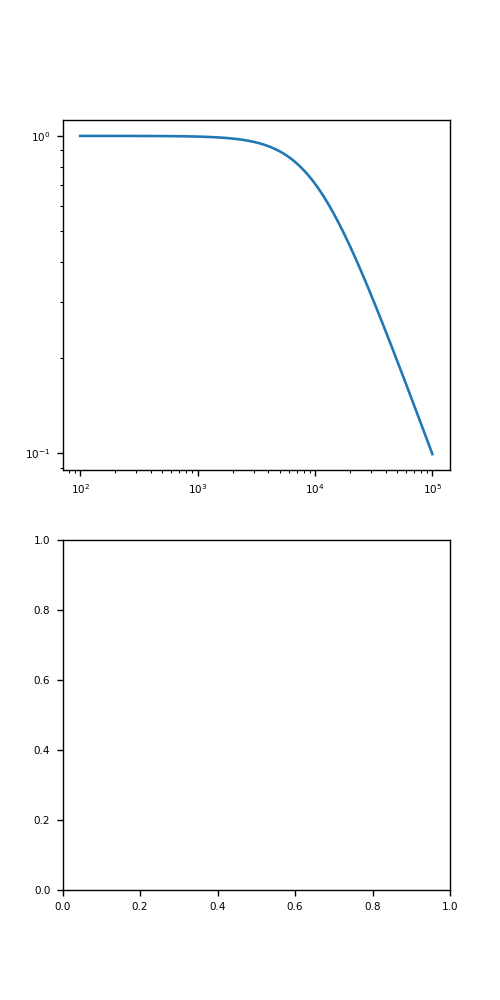

In [49]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import warnings
%matplotlib nbagg

def xfer(s):
    R = 1e6
    C = 100e-12
    return 1.0 / (R*C*s + 1.0)

w = np.logspace(2, 5, num=100)

raw = xfer(w*1j)

fig, ax = plt.subplots(2, 1, figsize=(4, 8))
ax[0].loglog(w, np.abs(raw))

plt.show()



<IPython.core.display.Javascript object>


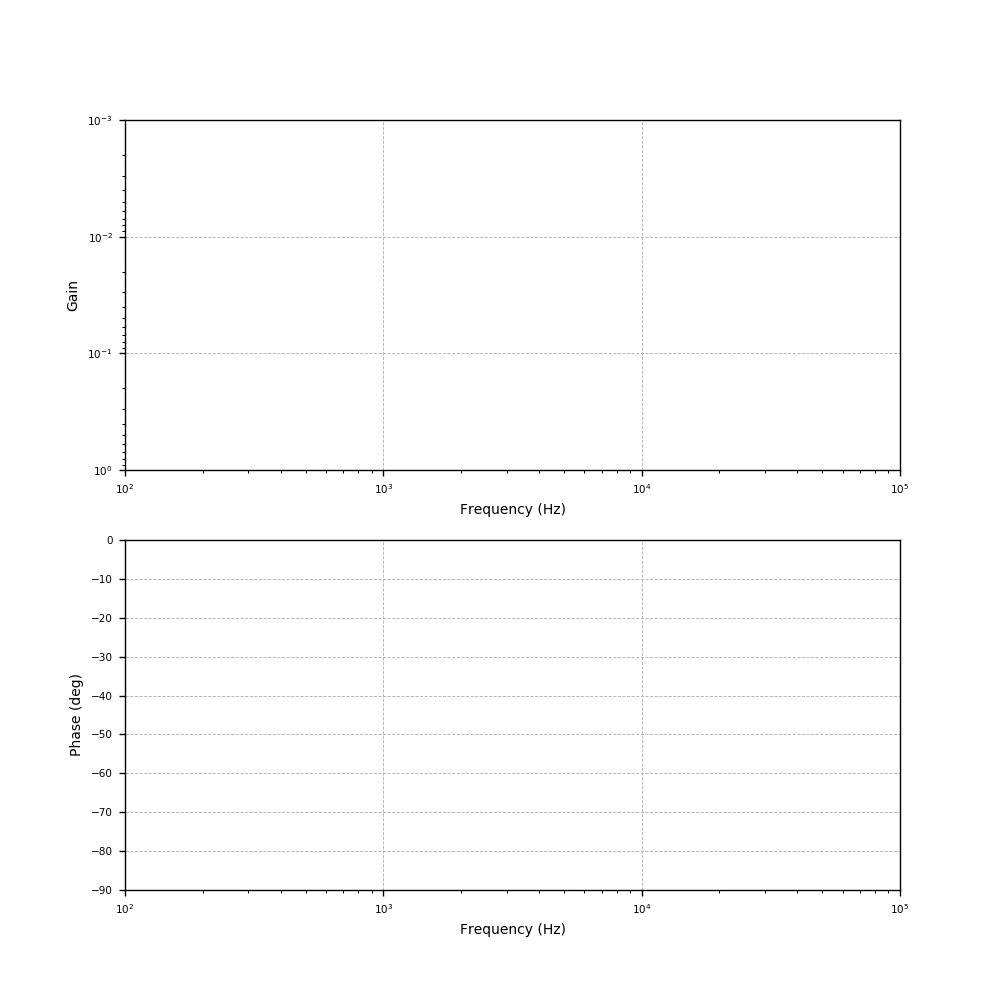

In [204]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib nbagg

def xfer(s):
    R = 1e6
    C = 100e-12
    return 1.0 / (R*C*s + 1.0)

w = np.logspace(2, 5, num=100)

raw = xfer(w*1j)

fig, ax = plt.subplots(2, 1, figsize=(8, 8))
#ax[0].loglog(w, np.abs(raw))

ax[0].set_xlim(1e2, 1e5)
ax[0].set_ylim(1e0, 1e-3)
ax[0].set_xscale("log")
ax[0].set_yscale("log")
ax[0].grid(linestyle='--', linewidth=0.5)
ax[0].set_xlabel('Frequency (Hz)', fontsize=8)
ax[0].set_ylabel('Gain', fontsize=8)

ax[1].set_xlim(1e2, 1e5)
ax[1].set_ylim(-90, 0)
ax[1].set_xscale("log")
ax[1].grid(linestyle='--', linewidth=0.5)
ax[1].set_xlabel('Frequency (Hz)', fontsize=8)
ax[1].set_ylabel('Phase (deg)', fontsize=8)

plt.show()

fig.savefig('Blank_Gain_Phase.pdf',
             dpi=None,
             facecolor='w',
             edgecolor='w',
             orientation='portrait',
             papertype=None,
             format='pdf',
             transparent=False,
             bbox_inches=None,
             pad_inches=0,
             frameon=None,
             metadata=None)




## Manifold Generation




<IPython.core.display.Javascript object>


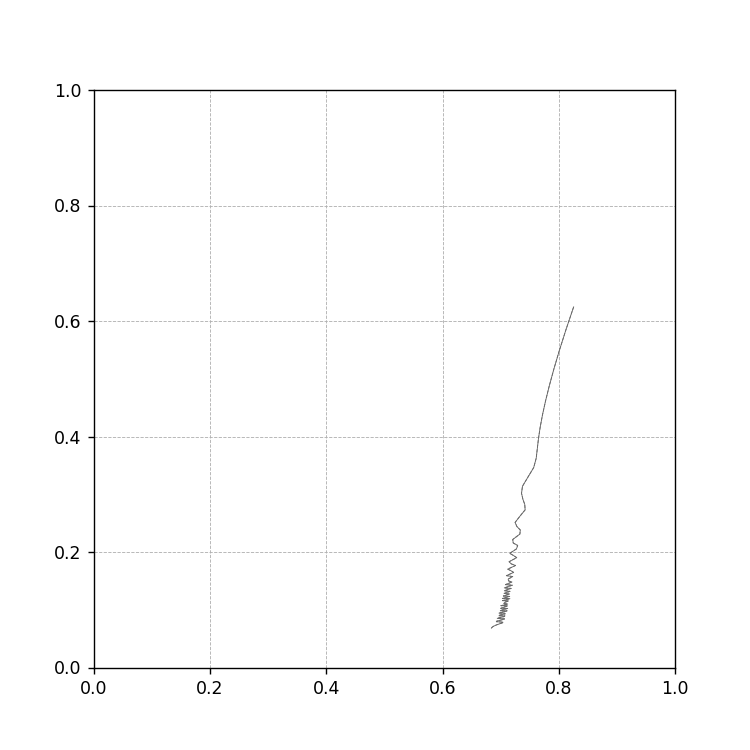

interactive(children=(FloatLogSlider(value=1000000.0, continuous_update=False, description='RA', max=7.0, min=…

In [10]:
from scipy.signal import *
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import warnings
%matplotlib nbagg

warnings.filterwarnings('ignore') # Suppress scipy.signal.lsim ill-conditioned matrix warnings

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

def sweep(t1, dt=1e-6, f0=2000.0, f1=26000.0):
    t = np.arange(0, t1, dt)
    u = chirp(t, f0, t1, f1)
    return u, t

def dcsManifold(RA=1e6, RB=1e6, RK=1e6, CpA=20e-12, CpB=20e-12):
    x = np.arange(0, 1.01, 0.1)
    Ct = np.arange(0, 2.01e-10, 20e-12)

    t1 = 4e-3
    dt = 1e-6
    f0 = 2000.0
    f1 = 26000.0
            
    manifold = np.zeros((len(x), len(Ct), ))

    for i, xval in enumerate(x):
        for j, Ctval in enumerate(Ct):
            sys = createSystem(x=xval, Ct=Ctval, RA=RA, RB=RB, RK=RK, CpA=CpA, CpB=CpB)
            
            u, t = sweep(t1, dt=dt, f0=f0, f1=f1)
            tout, y, x = lsim(sys, u, t)

            f = np.fft.fftfreq(len(u), dt)
            f = f[range(int(len(f)/2))]
            fidx = (f >= f0) & (f <= f1)

            ufft = abs(np.fft.fft(u))/len(u) # Normalize amplitude
            ufft = 2*ufft[range(int(len(u)/2))] # Exclude sampling frequency

            yfft = abs(np.fft.fft(y, axis=0))/len(y) # Normalize amplitude
            yfft = 2*yfft[range(int(len(y)/2))] # Exclude sampling frequency

            gainA = np.divide(yfft[fidx,0], ufft[fidx])
            gainB = np.divide(yfft[fidx,1], ufft[fidx])

            manifold[i,j,:] = gainA
            manifold[i,j,:] = gainB

    ax.clear()
    #ax.plot(manifold[:,:,0], manifold[:,:,1], '--', color='dimgray', linewidth=0.5)
    #ax.plot(manifold[:,:,0].T, manifold[:,:,1].T, '-', color='dimgray', linewidth=0.5)
    ax.plot(gainA, gainB, '--', color='dimgray', linewidth=0.5)
    ax.plot(gainA.T, gainB.T, '-', color='dimgray', linewidth=0.5)
    #ax.plot(np.mean(data1, 2)[:,0], np.mean(data1, 2)[:,1], color='tab:red', linewidth=0.5)
    #ax.plot(np.mean(data2, 2)[:,0], np.mean(data2, 2)[:,1], color='tab:blue', linewidth=0.5)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.grid(linestyle='--', linewidth=0.5)
    plt.show()


ra = widgets.FloatLogSlider(
    continuous_update=False,
    value=1e6,
    base=10,
    min=3,
    max=7,
    step=0.1,
    description='RA'
)

rb = widgets.FloatLogSlider(
    continuous_update=False,
    value=1e6,
    base=10,
    min=3,
    max=7,
    step=0.1,
    description='RB'
)

rk = widgets.FloatLogSlider(
    continuous_update=False,
    value=5e5,
    base=10,
    min=3,
    max=7,
    step=0.1,
    description='RK'
)

cpa = widgets.FloatLogSlider(
    continuous_update=False,
    value=1e-11,
    base=10,
    min=-13,
    max=-9,
    step=0.1,
    description='CpA'
)

cpb = widgets.FloatLogSlider(
    continuous_update=False,
    value=1e-11,
    base=10,
    min=-13,
    max=-9,
    step=0.1,
    description='CpB'
)

frange = widgets.FloatLogSlider(
    continuous_update=False,
    value=1e-11,
    base=10,
    min=-13,
    max=-9,
    step=0.1,
    description='CpB'
)

widgets.interactive(dcsManifold, RA=ra, RB=rb, RK=rk, CpA=cpa, CpB=cpb)

In [1]:
# Function to load CTS binary files

import numpy as np

# Load a CTS binary file (.txt, .ctsb)
def loadctsb(fname):

    with open(fname, 'r') as f:
        # Read the file header (4 int32 values)
        # dsize: The number of bytes per data value (e.g. 4 bytes in a float32)
        # channels: The number of measurements recorded simultaneously (e.g. 2 channels; A and B)
        # frequencies: The number of frequencies per sample (e.g. 96 values)
        # samples: The number of samples recorded per file (e.g. 250)
        [dsize, channels, frequencies, samples] = np.fromfile(f, dtype='l', count=4)
        # Seek to the beginning of the data region (16th byte)
        f.seek(16)
        # Read the data from the remainder of the file
        # Reshape the output data in the shape of the samples, channels and frequencies
        return np.fromfile(f, dtype=np.float32).reshape(samples, channels, frequencies)

<IPython.core.display.Javascript object>


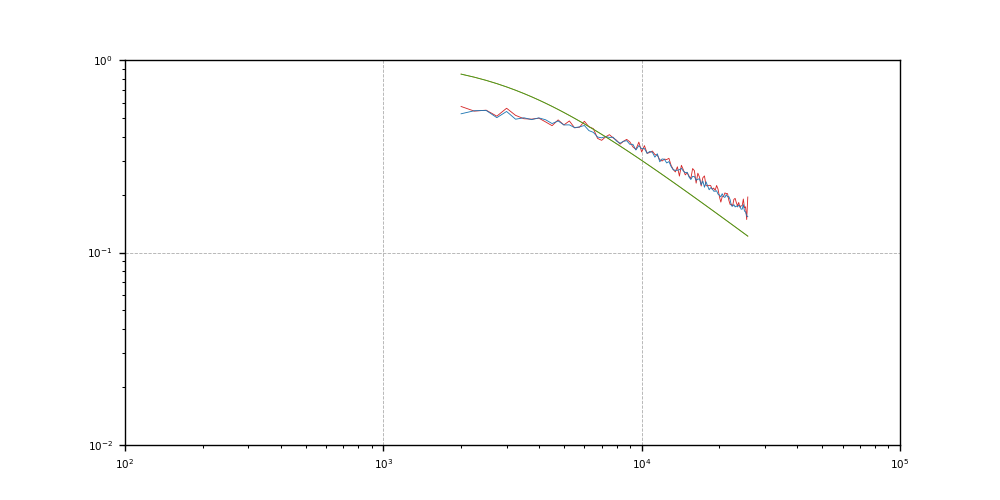

interactive(children=(FloatSlider(value=0.8, continuous_update=False, description='x', max=1.0, step=0.01), Fl…

In [191]:
import sys, os
from math import pi
import matplotlib.pyplot as plt
import numpy as np
%matplotlib nbagg

filepath1 = os.path.join('Resources', 'p001', 'trial001', 'participant001_trial001_button000.txt')
data1 = loadctsb(filepath1)

filepath2 = os.path.join('Resources', 'p001', 'trial001', 'participant001_trial001_button036.txt')
data2 = loadctsb(filepath2)

fig, ax = plt.subplots(1, 1, figsize=(8, 4))

f = np.arange(2000, 26000, 250)

def matchGains(x, Ct, CpA, CpB, RA, RB, RK):
    spec = analyticalSingleTouchSpectrum(2*pi*f, x, Ct, CpA=CpA, CpB=CpB, RA=RA, RB=RB, RK=RK)

    ax.clear()
    ax.loglog(f, data1[125,0,:], color='tab:red', linewidth=0.5)
    ax.loglog(f, data1[125,1,:], color='tab:blue', linewidth=0.5)
    ax.loglog(f, np.abs(spec)[:,0], color='tab:orange', linewidth=0.5)
    ax.loglog(f, np.abs(spec)[:,1], color='tab:green', linewidth=0.5)
    #ax.plot(np.mean(data2, 2)[:,0], np.mean(data2, 2)[:,1], color='tab:blue', linewidth=0.5)

    #ax.plot(np.mean(data1, 2)[:,0], np.mean(data1, 2)[:,1], color='tab:red', linewidth=0.5)
    #ax.plot(np.mean(data2, 2)[:,0], np.mean(data2, 2)[:,1], color='tab:blue', linewidth=0.5)
    ax.set_xlim(1e2, 1e5)
    ax.set_ylim(1e-2, 1e0)
    ax.grid(linestyle='--', linewidth=0.5)
    plt.show()


ct = widgets.FloatLogSlider(
    continuous_update=False,
    value=1e-10,
    base=10,
    min=-12,
    max=-9,
    step=0.1,
    description='Ct'
)
pos = widgets.FloatSlider(
    continuous_update=False,
    value=.8,
    min=0,
    max=1,
    step=0.01,
    description='x'
)
cpa = widgets.FloatLogSlider(
    continuous_update=False,
    value=1e-10,
    base=10,
    min=-12,
    max=-9,
    step=0.1,
    description='CpA'
)
cpb = widgets.FloatLogSlider(
    continuous_update=False,
    value=1e-10,
    base=10,
    min=-12,
    max=-9,
    step=0.1,
    description='CpB'
)
ra = widgets.FloatLogSlider(
    continuous_update=False,
    value=1e6,
    base=10,
    min=3,
    max=7,
    step=0.1,
    description='RA'
)

rb = widgets.FloatLogSlider(
    continuous_update=False,
    value=1e6,
    base=10,
    min=3,
    max=7,
    step=0.1,
    description='RB'
)

rk = widgets.FloatLogSlider(
    continuous_update=False,
    value=5e5,
    base=10,
    min=3,
    max=7,
    step=0.1,
    description='RK'
)

widgets.interactive(matchGains, x=pos, Ct=ct, CpA=cpa, CpB=cpb, RA=ra, RB=rb, RK=rk)

In [ ]:
# Inverse FFT

import sys, os
from math import pi
import matplotlib.pyplot as plt
import numpy as np
%matplotlib nbagg

filepath1 = os.path.join('Resources', 'p001', 'trial001', 'participant001_trial001_button000.txt')
data1 = loadctsb(filepath1)











In [2]:
import ipywidgets as widgets

widgets.FloatRangeSlider(
    value=[5, 7.5],
    min=0,
    max=10.0,
    step=0.1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

FloatRangeSlider(value=(5.0, 7.5), continuous_update=False, description='Test:', max=10.0, readout_format='.1f…

In [3]:
import ipywidgets as widgets

widgets.FloatProgress(
    value=7.5,
    min=0,
    max=10.0,
    step=0.1,
    description='Loading:',
    bar_style='info',
    orientation='horizontal'

)

FloatProgress(value=7.5, bar_style='info', description='Loading:', max=10.0)

In [ ]:
from enum import Enum
class bufferType(Enum):
    PB_DATA_NORMAL = 1
    PB_DATA_MIN = 2
    PB_DATA_MAX = 3
    PB_DATA_COUNTS = 4
    PB_DATA_LOGIC = 5

data[waveformIndex].voltage[:,bufferIndex] = np.fromfile(f, dtype=np.float32, count=points)
data[waveformIndex].voltage[:,bufferIndex] = np.fromfile(f, dtype=np.int32, count=points)
data[waveformIndex].voltage[:,bufferIndex] = np.fromfile(f, dtype=np.uint8, count=points)
data[waveformIndex].voltage[:,bufferIndex] = np.fromfile(f, dtype=np.uint8, count=points)







%if (waveformIndex == waveformSelect)
        if ((bufferType == 1) || (bufferType == 2) || (bufferType == 3))
            % bufferType is PB_DATA_NORMAL, PB_DATA_MIN, or PB_DATA_MAX (float)
            data(waveformIndex).Voltage(:, bufferIndex) = fread(fileId, nPoints, 'float');
        elseif (bufferType == 4)
            % bufferType is PB_DATA_COUNTS (int32)
            data(waveformIndex).Voltage(:, bufferIndex) = fread(fileId, nPoints, '*int32');
        elseif (bufferType == 5)
            % bufferType is PB_DATA_LOGIC (int8)
            data(waveformIndex).Voltage(:, bufferIndex) = fread(fileId, nPoints, '*uint8');
        else
            % unrecognized bufferType read as unformated bytes
            data(waveformIndex).Voltage(:, bufferIndex) = fread(fileId, bufferSize, '*uint8');
        end
        %else
        %    fseek(fileId, bufferSize, 'cof');
        %end
    end

In [23]:
import numpy as np

fname = 'baseline.bin'


class fileHeader:
    def __init__(self):
        self.fileCookie = ''
        self.fileVersion = ''
        self.fileSize = 0
        self.waveforms = 0
        self.channels = 0
        self.segments = 0
        
    def __str__(self):
        return self.fileCookie + '\n' + \
            self.fileVersion + '\n' + \
            str(self.fileSize) + '\n' + \
            str(self.waveforms)

class waveformHeader:
    def __init__(self):
        self.headerSize = 0
        self.waveformType = 0
        self.headerSize = 0
        self.waveformType = 0
        self.waveformBuffers = 0
        self.points = 0
        self.count = 0
        self.xDisplayRange = 0
        self.xDisplayOrigin = 0
        self.xIncrement = 0
        self.xOrigin = 0
        self.xUnits = 0
        self.yUnits = 0
        self.dateString = ''
        self.timeString = ''
        self.frameString = ''
        self.waveformString = ''
        self.timeTag = 0
        self.segmentIndex = 0

        def __str__(self):
            return str(self.headerSize) + '\n' + \
                str(self.waveformType) + '\n' + \
                str(self.headerSize) + '\n' + \
                str(self.waveformType) + '\n' + \
                str(self.waveformBuffers) + '\n' + \
                str(self.points) + '\n' + \
                str(self.count) + '\n' + \
                str(self.xDisplayRange) + '\n' + \
                str(self.xDisplayOrigin) + '\n' + \
                str(self.xIncrement) + '\n' + \
                str(self.xOrigin) + '\n' + \
                str(self.xUnits) + '\n' + \
                str(self.yUnits) + '\n' + \
                self.dateString + '\n' + \
                self.timeString + '\n' + \
                self.frameString + '\n' + \
                self.waveformString + '\n' + \
                str(self.timeTag) + '\n' + \
                str(self.segmentIndex)
        
class waveformData:
    def __init__(self):
        self.time = 0
        self.voltage = 0

class Frame:
    def __init__(self):
        self.waveformheader = waveformHeader()
        self.waveformdata = waveformData()

class Waveform:
    def __init__(self):
        self.fileHeader = fileHeader()

    def loadKeysightBin(self, fname):
        with open(fname, 'rb') as f:
            # Populate the file header
            self.fileHeader.fileCookie = ''.join([chr(item) for item in np.fromfile(f, dtype=np.uint8, count=2)]) # file cookie "AG"
            self.fileHeader.fileVersion = ''.join([chr(item) for item in np.fromfile(f, dtype=np.uint8, count=2)]) # file version (e.g. "10")
            self.fileHeader.fileSize = np.fromfile(f, dtype=np.uint32, count=1)[0]
            self.fileHeader.waveforms = np.fromfile(f, dtype=np.uint32, count=1)[0]

            self.waveformHeader = waveformHeader()

            #for i in range(self.fileheader.waveforms):
            #self.waveforms.append()

            self.waveformHeader.headerSize = np.fromfile(f, dtype=np.int32, count=1)[0]
            self.waveformHeader.waveformType = np.fromfile(f, dtype=np.int32, count=1)[0]
            self.waveformHeader.waveformBuffers = np.fromfile(f, dtype=np.int32, count=1)[0]
            self.waveformHeader.points = np.fromfile(f, dtype=np.int32, count=1)[0]
            self.waveformHeader.count = np.fromfile(f, dtype=np.int32, count=1)[0]
            self.waveformHeader.xDisplayRange = np.fromfile(f, dtype=np.float32, count=1)[0]
            self.waveformHeader.xDisplayOrigin = np.fromfile(f, dtype=np.float64, count=1)[0]
            self.waveformHeader.xIncrement = np.fromfile(f, dtype=np.float64, count=1)[0]
            self.waveformHeader.xOrigin = np.fromfile(f, dtype=np.float64, count=1)[0]
            self.waveformHeader.xUnits = np.fromfile(f, dtype=np.int32, count=1)[0]
            self.waveformHeader.yUnits = np.fromfile(f, dtype=np.int32, count=1)[0]
            self.waveformHeader.dateString = ''.join([chr(item) for item in np.fromfile(f, dtype=np.uint8, count=16)])
            self.waveformHeader.timeString = ''.join([chr(item) for item in np.fromfile(f, dtype=np.uint8, count=16)])
            self.waveformHeader.frameString = ''.join([chr(item) for item in np.fromfile(f, dtype=np.uint8, count=24)])
            self.waveformHeader.waveformString = ''.join([chr(item) for item in np.fromfile(f, dtype=np.uint8, count=16)])
            self.waveformHeader.timeTag = np.fromfile(f, dtype=np.float64, count=1)[0]
            self.waveformHeader.segmentIndex = np.fromfile(f, dtype=np.uint32, count=1)[0]

w = Waveform()
w.loadKeysightBin(fname)

print(w.fileHeader)
print(w.waveformHeader.count)

AG
10
25000620
4
1


In [29]:
class KeysightBinaryFileHeader:
    def __init__(self, fileID):
        self.fileCookie = "".join([chr(item) for item in np.fromfile(fileID, dtype=np.uint8, count=2)]) # file cookie "AG"
        self.fileVersion = "".join([chr(item) for item in np.fromfile(fileID, dtype=np.uint8, count=2)]) # file version (e.g. "10")
        self.fileSize = np.fromfile(fileID, dtype=np.uint32, count=1)
        self.waveforms = np.fromfile(fileID, dtype=np.uint32, count=1)
        self.channels = None # Additional data
        self.segments = None # Additional data

class KeysightWaveform:
    def __init__(self):
        self.waveformHeader
        self.data

class KeysightBinaryFileWaveformHeader:
    def __init__(self, fileID):
        self.headerSize = np.fromfile(fileID, dtype=np.int32, count=1)
        self.waveformType = np.fromfile(fileID, dtype=np.int32, count=1)
        self.waveformBuffers = np.fromfile(fileID, dtype=np.int32, count=1)
        self.points = np.fromfile(fileID, dtype=np.int32, count=1)
        self.count = np.fromfile(fileID, dtype=np.int32, count=1)
        self.xDisplayRange = np.fromfile(fileID, dtype=np.float32, count=1)
        self.xDisplayOrigin = np.fromfile(fileID, dtype=np.float64, count=1)
        self.xIncrement = np.fromfile(fileID, dtype=np.float64, count=1)
        self.xOrigin = np.fromfile(fileID, dtype=np.float64, count=1)
        self.xUnits = np.fromfile(fileID, dtype=np.int32, count=1)
        self.yUnits = np.fromfile(fileID, dtype=np.int32, count=1)
        self.dateString = "".join([chr(item) for item in np.fromfile(fileID, dtype=np.uint8, count=16)])
        self.timeString = "".join([chr(item) for item in np.fromfile(fileID, dtype=np.uint8, count=16)])
        self.frameString = "".join([chr(item) for item in np.fromfile(fileID, dtype=np.uint8, count=24)])
        self.waveformString = "".join([chr(item) for item in np.fromfile(fileID, dtype=np.uint8, count=16)])
        self.timeTag = np.fromfile(fileID, dtype=np.float64, count=1)
        self.segmentIndex = np.fromfile(fileID, dtype=np.uint32, count=1)
        
        

In [30]:
class KeysightObject:
    
    def __init__(self, filename):
        with open(filename, 'rb') as fileID:
            self.fileHeader = KeysightBinaryFileHeader(fileID)
            self.waveform = KeysightWaveform
            
            self.waveformHeader = KeysightBinaryFileWaveformHeader(fileID)
            fileID.close()
            


        

        



In [34]:
ko = KeysightObject('baseline.bin')

ko.waveformHeader.waveformString


'1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'


fileHeader = struct('fileCookie',  [], ... % File cookie, 'AG'
                        'fileVersion', [], ... % File version string
                        'fileSize',    [], ... % File size in bytes
                        'nWaveforms',  [], ... % Total number of stored waveforms
                        'channels',    [], ... % Added, 1-4 analog
                        'segments',    []);    % Added, 1 to 1000

    waveformHeader = struct('headerSize',       [], ... % 
                            'waveformType',     [], ... % 
                            'nWaveformBuffers', [], ... % 
                            'nPoints',          [], ... % 
                            'count',            [], ... % 
                            'xDisplayRange',    [], ... % 
                            'xDisplayOrigin',   [], ... % 
                            'xIncrement',       [], ... % 
                            'xOrigin',          [], ... % 
                            'xUnits',           [], ... % 
                            'yUnits',           [], ... % 
                            'dateString',       [], ... % 
                            'timeString',       [], ... % 
                            'frameString',      [], ... % 
                            'waveformString',   [], ... % 
                            'timeTag',          [], ... % 
                            'segmentIndex',     []);    % 

    data = struct('Time',    [], ... % 
                  'Voltage', []);    % 

    fileId = fopen(filename, 'r');

    % Read file header
    fileCookie = fread(fileId, 2, 'char');
    fileVersion = fread(fileId, 2, 'char');
    fileSize = fread(fileId, 1, 'int32');
    nWaveforms = fread(fileId, 1, 'int32');

    % Write file header values to the fileHeader structure
    fileHeader.fileCookie = char(fileCookie');
    fileHeader.fileVersion = char(fileVersion');
    fileHeader.fileSize = fileSize;
    fileHeader.nWaveforms = nWaveforms;

    waveformStringCell = cell(nWaveforms, 1);
    
    
    for waveformIndex = 1:nWaveforms
        % read waveform header
        headerSize = fread(fileId, 1, 'int32'); bytesLeft = headerSize - 4;
        waveformType = fread(fileId, 1, 'int32'); bytesLeft = bytesLeft - 4;
        nWaveformBuffers = fread(fileId, 1, 'int32'); bytesLeft = bytesLeft - 4;
        nPoints = fread(fileId, 1, 'int32'); bytesLeft = bytesLeft - 4;
        count = fread(fileId, 1, 'int32');  bytesLeft = bytesLeft - 4;
        xDisplayRange = fread(fileId, 1, 'float32');  bytesLeft = bytesLeft - 4;
        xDisplayOrigin = fread(fileId, 1, 'double');  bytesLeft = bytesLeft - 8;
        xIncrement = fread(fileId, 1, 'double');  bytesLeft = bytesLeft - 8;
        xOrigin = fread(fileId, 1, 'double');  bytesLeft = bytesLeft - 8;
        xUnits = fread(fileId, 1, 'int32');  bytesLeft = bytesLeft - 4;
        yUnits = fread(fileId, 1, 'int32');  bytesLeft = bytesLeft - 4;
        dateString = fread(fileId, 16, 'char'); bytesLeft = bytesLeft - 16;
        timeString = fread(fileId, 16, 'char'); bytesLeft = bytesLeft - 16;
        frameString = fread(fileId, 24, 'char'); bytesLeft = bytesLeft - 24;
        waveformString = fread(fileId, 16, 'char'); bytesLeft = bytesLeft - 16;
        timeTag = fread(fileId, 1, 'double'); bytesLeft = bytesLeft - 8;
        segmentIndex = fread(fileId, 1, 'uint32'); bytesLeft = bytesLeft - 4;

        % 
        waveformHeader(waveformIndex).headerSize = headerSize;
        waveformHeader(waveformIndex).waveformType = waveformType;
        waveformHeader(waveformIndex).nWaveformBuffers = nWaveformBuffers;
        waveformHeader(waveformIndex).nPoints = nPoints;
        waveformHeader(waveformIndex).count = count;
        waveformHeader(waveformIndex).xDisplayRange = xDisplayRange;
        waveformHeader(waveformIndex).xDisplayOrigin = xDisplayOrigin;
        waveformHeader(waveformIndex).xIncrement = xIncrement;
        waveformHeader(waveformIndex).xOrigin = xOrigin;
        waveformHeader(waveformIndex).xUnits = xUnits;
        waveformHeader(waveformIndex).yUnits = yUnits;
        waveformHeader(waveformIndex).dateString = char(dateString');
        waveformHeader(waveformIndex).timeString = char(timeString');
        waveformHeader(waveformIndex).frameString = char(frameString');
        waveformHeader(waveformIndex).waveformString = char(waveformString');
        waveformHeader(waveformIndex).timeTag = timeTag;
        waveformHeader(waveformIndex).segmentIndex = segmentIndex;
        
        waveformStringCell(waveformIndex) = {waveformHeader(waveformIndex).waveformString};
        
        % skip over any remaining data in the header
        fseek(fileId, bytesLeft, 'cof');

        % generate time vector from xIncrement and xOrigin values
        data(waveformIndex).Time = timeTag + (xIncrement*(0:(nPoints-1))') + xOrigin;


        for bufferIndex = 1:nWaveformBuffers
            % read waveform buffer header
            headerSize = fread(fileId, 1, 'int32'); bytesLeft = headerSize - 4;
            bufferType = fread(fileId, 1, 'int16'); bytesLeft = bytesLeft - 2;
            bytesPerPoint = fread(fileId, 1, 'int16'); bytesLeft = bytesLeft - 2;
            bufferSize = fread(fileId, 1, 'int32'); bytesLeft = bytesLeft - 4;

            % skip over any remaining data in the header
            fseek(fileId, bytesLeft, 'cof');

            %if (waveformIndex == waveformSelect)
            if ((bufferType == 1) || (bufferType == 2) || (bufferType == 3))
                % bufferType is PB_DATA_NORMAL, PB_DATA_MIN, or PB_DATA_MAX (float)
                data(waveformIndex).Voltage(:, bufferIndex) = fread(fileId, nPoints, 'float');
            elseif (bufferType == 4)
                % bufferType is PB_DATA_COUNTS (int32)
                data(waveformIndex).Voltage(:, bufferIndex) = fread(fileId, nPoints, '*int32');
            elseif (bufferType == 5)
                % bufferType is PB_DATA_LOGIC (int8)
                data(waveformIndex).Voltage(:, bufferIndex) = fread(fileId, nPoints, '*uint8');
            else
                % unrecognized bufferType read as unformated bytes
                data(waveformIndex).Voltage(:, bufferIndex) = fread(fileId, bufferSize, '*uint8');
            end
            %else
            %    fseek(fileId, bufferSize, 'cof');
            %end
        end
    end
    fclose(fileId);
    
    [C, IA, IC] = unique(waveformStringCell);
    fileHeader.channels = length(C);
    u = unique([waveformHeader.segmentIndex]);
    fileHeader.segments = size(u, 2);
    
    data = reshape(data, fileHeader.segments, fileHeader.channels);
    waveformHeader = reshape(waveformHeader, fileHeader.segments, fileHeader.channels);

    varargout{1} = data;
    if (nargout > 1)
        varargout{2} = fileHeader;
    end
    
    if (nargout > 2)
        varargout{3} = waveformHeader;
    end
end



## Resistor Networks





In [5]:
!ngspice Resources/test-transient-matrix.cir

## Waveform Sweep

<IPython.core.display.Javascript object>


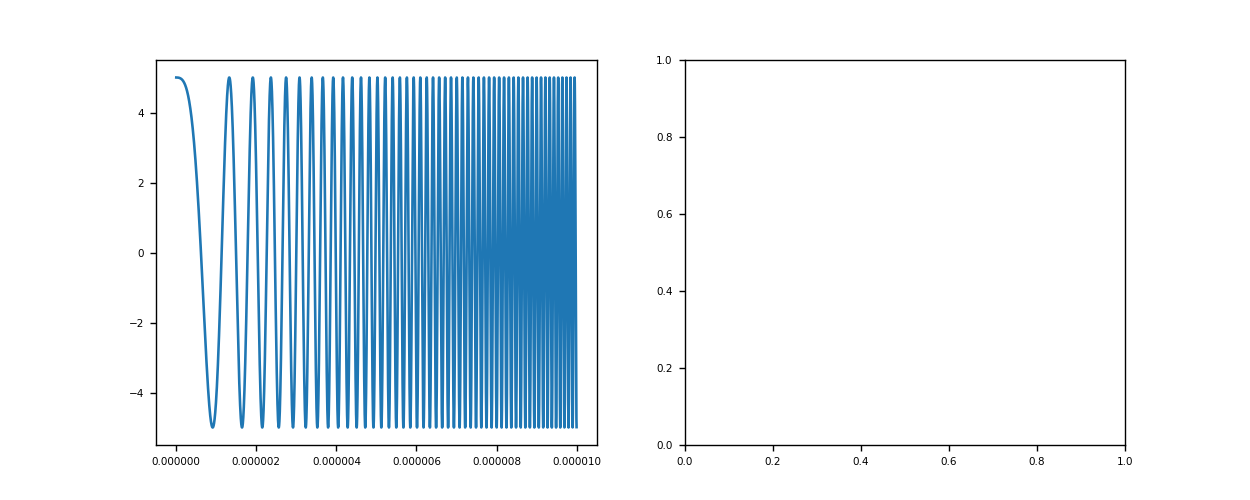

10000


In [24]:
from scipy.signal import *
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
from math import pi
%matplotlib nbagg

def sweep(t1, dt=1e-6, f0=1000.0, f1=5000.0):
    t = np.arange(0, t1, dt)
    # u = chirp(t, f0, t1, f1)
    u = 5*np.cos(2*pi*f0*t + (f1-f0)*pi*t**2/t1)
    return u, t

t1 = 1e-5
dt = 1e-9
f0 = 0.1e6
f1 = 10e6

u, t = sweep(t1, dt=dt, f0=f0, f1=f1)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(t, u)

print(len(t))
plt.show()




In [32]:
import numpy as np

a = np.zeros((2,2))
b = 1

print(type(a))
print(type(b))


class test:
    def __init__(self):
        self.tst = "1"
        
    #def __str__(self):
    #    return self.tst

class rect:
    def __init__(self, a, b):
        self.a = a
        self.b = b
        self.area = self.getArea()
    
    def getArea(self):
        self.area = self.a * self.b
        return self.area
        
r = rect(2, 3)
print(r.area)
r.a = 7
r.b = 5
print(r.getArea())

    
t = test()
print(type(t))
print(t)
str(t)

<class 'numpy.ndarray'>
<class 'int'>
6
35
<class '__main__.test'>


'<__main__.test object at 0x0000000005E1E1D0>'